# **Email Campaign Effectiveness Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -**Sonam Dhiman
##### **Team Member 2 -**Moditha Vasuki R


# **Project Summary -**

The majority of small- to medium-sized business owners employ email marketing strategies based on Gmail to target offline audiences and turn leads into paying clients who will continue to do business with them. The main objective is to create a machine learning model that will allow users to characterise and monitor email that is forwarded, read, and acknowledged by the reader. The data columns provide clear explanations.

**Understanding the Data:**
Understanding the data and obtaining the answers to some fundamental questions, such as What is the data about, is the first stage. What is the number of rows or observations in it? How many features does it have? What types of data are there? Exist any missing values here? Additionally, anything that would be pertinent to and helpful to our research.
Just for now, let's get familiar with the dataset and the concepts used before moving on. Our data collection consists of 12 features (columns) and 68353 observations (rows) regarding the emails. Integer, float, and object data types were used.
Let's describe the characteristics at play:
*   Email Id - It includes the email IDs of the clients or people.
*   Email Type - There are two types of emails: categories 1 and 2. They can be compared to marketing emails, significant updates, or emails with notices about the company.
*  Email Source - The source of the email, such as sales and marketing or significant administrative emails pertaining to the product, is represented by this.
*  Subject Hotness Score -The subject of the email is given a score based on how well-written and impactful the information is.
*  Email Campaign Type - The email campaign's campaign kind.
*  Total Past Communications - The number of communications had and the total number of emails sent from the same source are both listed in this column.
*  Customer Location - contains information about the customer's demographics and where they live.
*  Time Email sent Category - It has three categories: 1, 2, and 3; we might think of these as the hours of the morning, the afternoon, and the evening when the email was sent.
* Word Count - a measure of the email's word count.
*  Total links -How many links are in the email.
* Total Images -how many photos are present in the email.
* Email Status - Whether the message was ignored, read, or acknowledged by the reader is the value of our goal variable.

**Approach:**
Here, the strategy is to first examine the data's integrity before comprehending the relevant properties. What transpired next was according to our strategy:
* Understanding the Data

* Data cleaning and preprocessing-
finding null values and imputing them

with appropriate values.
* Exploratory data analysis- of
categorical and continuous variables
against our target variable.
* Data manipulation- feature selection
and engineering, handling
multicollinearity with the help of VIF
scores, feature scaling, and encoding.
* Handling Class Imbalance- our dataset
was highly imbalance with an 80%
majority, strategy was to undersampling and
oversampling with SMOTE on the train
sets only so that our test set remains
unknown to the models, we also applied SMTETomek which is hybridisation of oversampling and undersampling ,so that we can compare our results

* Modeling- worked on an evaluation
code which was frequently used to
evaluate the same models on
undersampled , oversampled SMOTE and SMOTETomek data in
one go,  decision
trees, random forest, KNN, and XGB, Gradient Boosting, AdaBoost and SVM
were run to evaluate the results and then
concluded on the basis of model
performance and enhancedits performance using Hypertuning the model parameters.We used RandomisedSearchCV technique


# **GitHub Link -**

https://github.com/Moditha06/Email-Campaign-Effectiveness-Prediction

# **Problem Statement**


The majority of small- to medium-sized business owners are successfully using Gmail-based email marketing strategies for offline targeting in order to convert their potential customers into leads and keep them as clients. To characterise mail and track mail that is ignored, read, and acknowledged by the reader is the core goal of developing a machine learning model. Data columns provide clear descriptions.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
pip install scikit-optimize

In [ ]:
# Import Libraries
# Importing important libraries and modules
# For data reading and manipulation
import pandas as pd
import numpy as np

# For data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

# Visualizing missing values
import missingno as msno

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modelling
# Train-Test Split
from sklearn.model_selection import train_test_split
# Grid Search for Hyperparameter Tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

import xgboost as xgb
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
#reading the csv dataset
df = pd.read_csv("/content/drive/MyDrive/data_email_campaign.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head(5)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(68353, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'we have {len(df[df.duplicated()])} duplicate values')

we have 0 duplicate values


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

<Axes: >

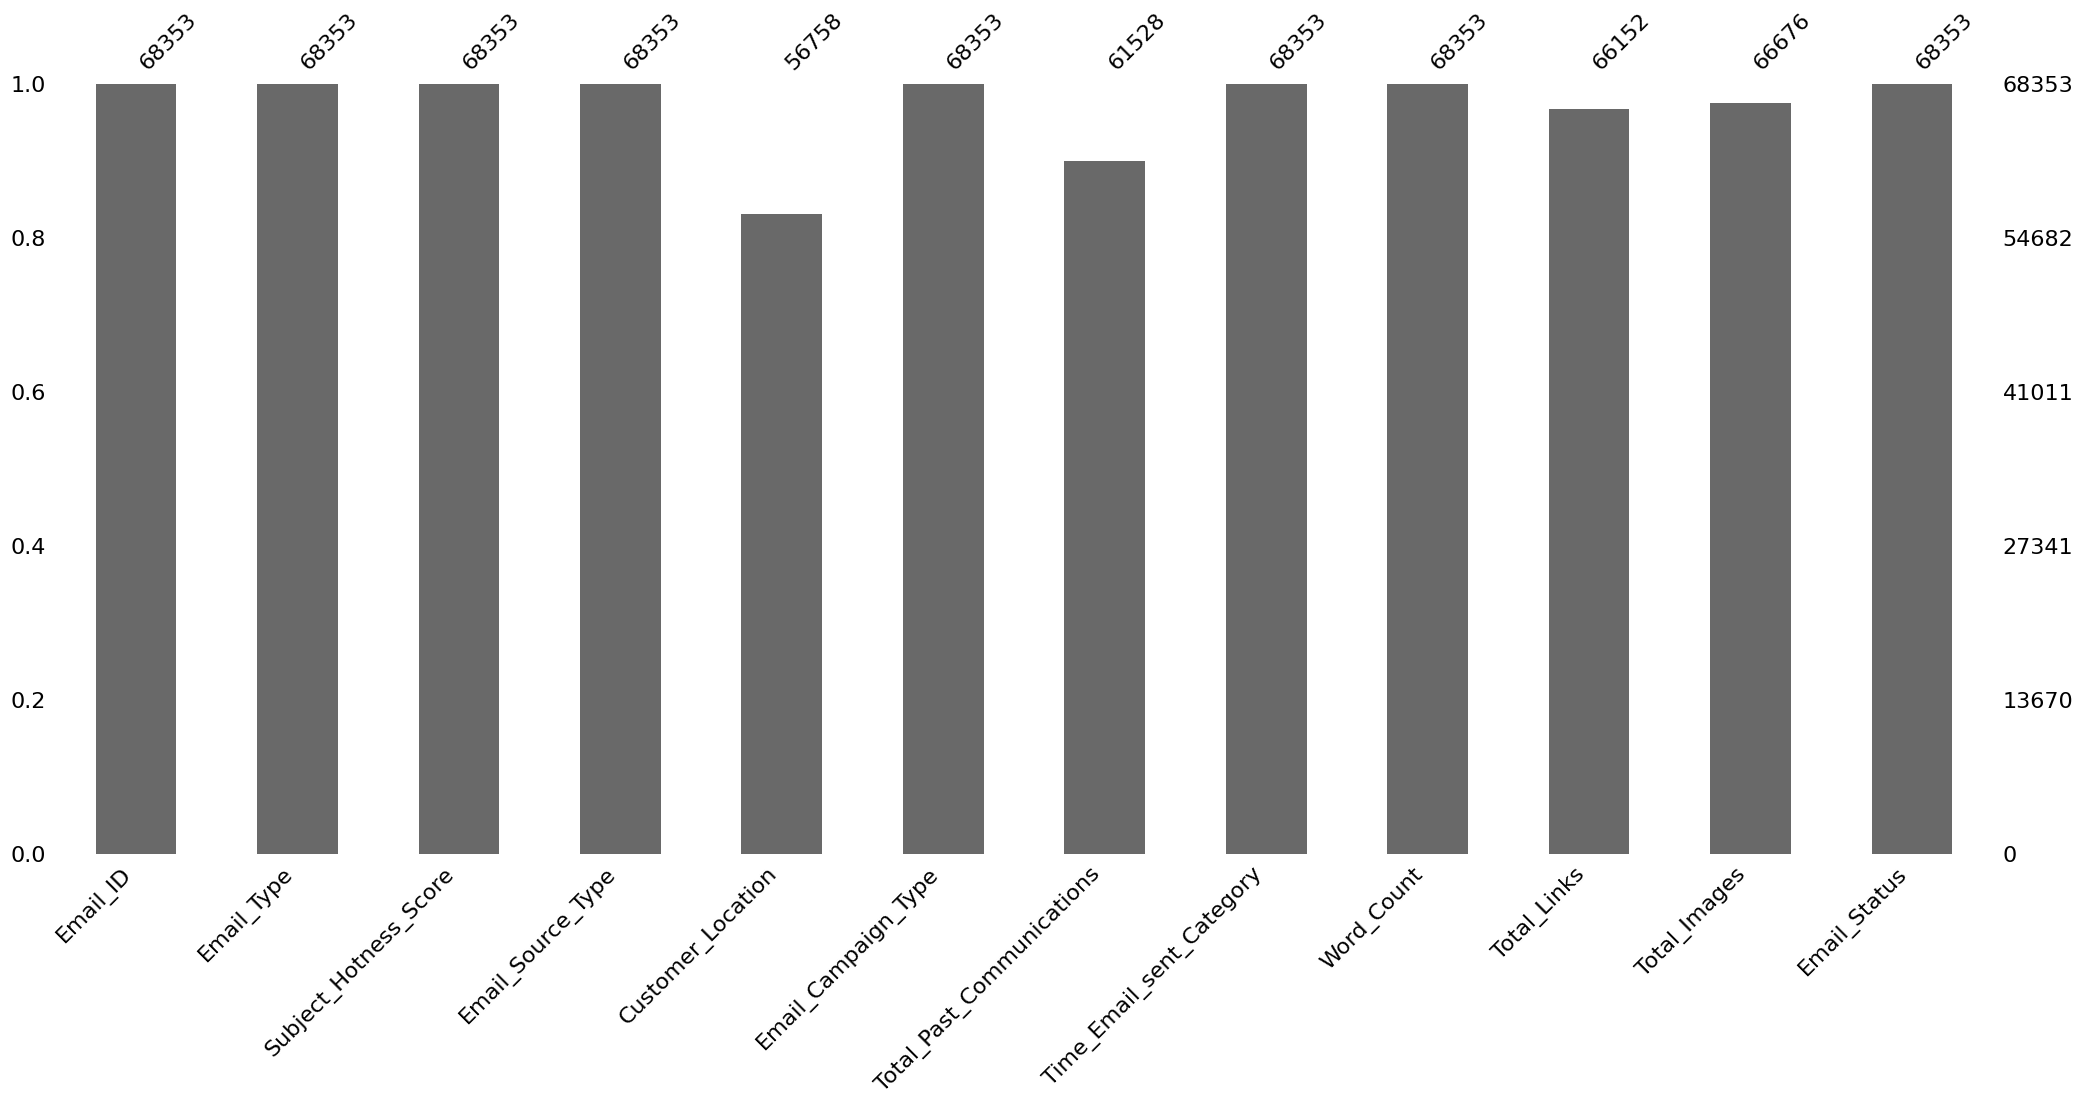

In [ ]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

Dataset has 12 attributes and 68353 rows

Among the 12 atributes, 6 are categorical.
1.  email_type
2.  email_source_type
3.  costomer_location
4.  email_campaign_type
5.  time_email_sent_category
6.  email_status

Rest of others are continuous.

We have null values in costomer_location ,total_past_communications ,total_links and total_images


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


### Variables Description

1.   Email_source, email_type are mostly contains 1 as min value , 25th and 50th percentiles values are 1 only so it might be possitively skewed


2.   Also the total_images and email_status have mostly 0 values as min and 25th and 50th percentile values are 0


3.   Time_email_sent_category contains mainly 2 that is evening time

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

Email_ID                     68353
Email_Type                       2
Subject_Hotness_Score           51
Email_Source_Type                2
Customer_Location                7
Email_Campaign_Type              3
Total_Past_Communications       64
Time_Email_sent_Category         3
Word_Count                     151
Total_Links                     37
Total_Images                    45
Email_Status                     3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.drop(['Email_ID'],axis=1,inplace=True)

### What all manipulations have you done and insights you found?

As Email_ID contain all unique values so it would not be required for further analysis and prediction. Now the Dataset is ready for the Analysis.

## ***4. Data Vizualization***

**Defining a function for showing bar percentage**

In [ ]:
# code for showing bar percentage
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable
        ax: Axes object (for Seaborn Countplot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 7 X categories, 3 hues =>
        ##    [0, 8, 16] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")



#### Chart - 1

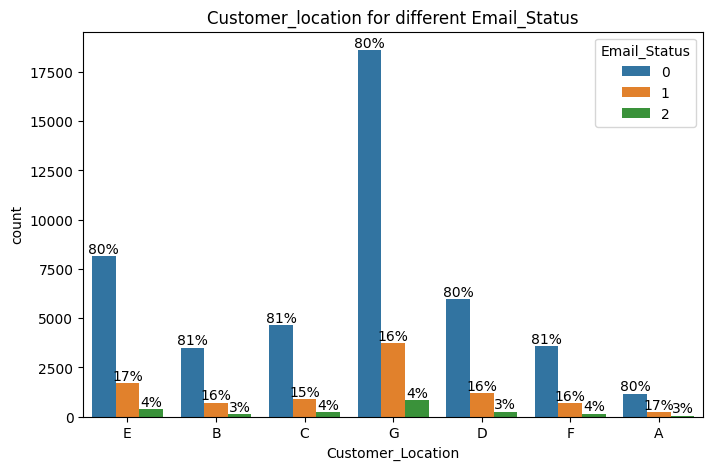

In [ ]:
# Chart - 1 Visualization code

ax=sns.countplot(x=df['Customer_Location'],hue=df["Email_Status"])
plt.title('Customer_location for different Email_Status')
barPerc(df,'Customer_Location',ax)


##### 1. Why did you pick the specific chart?

**This is required for the analysis of customer location feature.**

##### 2. What is/are the insight(s) found from the chart?

**Customer_Location contains highly G values and we can see that it is not making any impact on the dependent variable as the ratio is same.
So we can drop the this Customer_Location column**

#### Chart - 2

Text(0.5, 1.0, 'Total_Past_Communications Distribution')

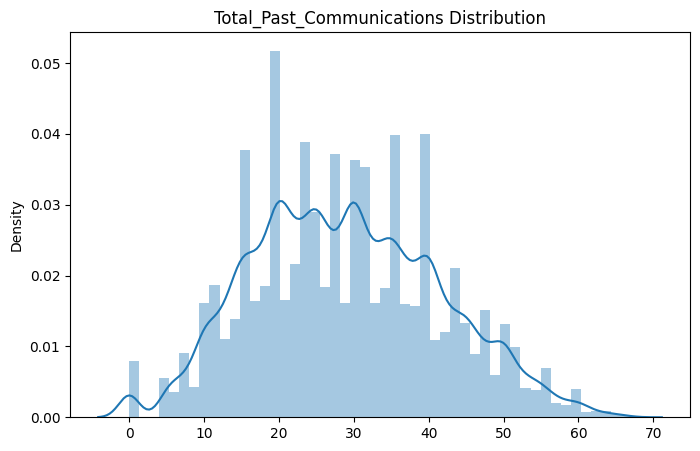

In [ ]:
# Chart - 2 Visualization code
sns.distplot(x=df['Total_Past_Communications'], hist = True)
plt.title('Total_Past_Communications Distribution')

##### 1. Why did you pick the specific chart?

**To see the distribution of Total Past Communications to get what majority of the data tends to, so that we can fill the null values accordingly.**

##### 2. What is/are the insight(s) found from the chart?

**Total_past_communications seems to normally distributed mostly values lies between 25 to 35.**

#### Chart - 3

Text(0.5, 1.0, 'Total_Links Distribution')

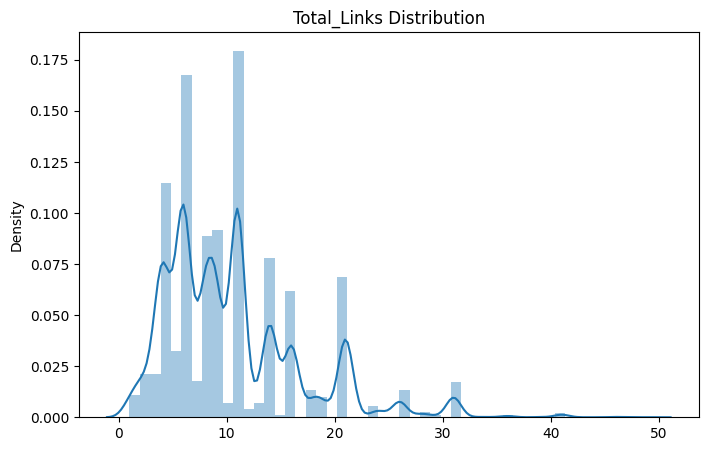

In [ ]:
# Chart - 3 Visualization code
sns.distplot(x=df['Total_Links'], hist= True)
plt.title('Total_Links Distribution')

##### 1. Why did you pick the specific chart?

**To see the distribution of Total Links to get what majority of the data tends to so that we can fill the null values accordingly.**

##### 2. What is/are the insight(s) found from the chart?

**It is more or less postively skewed and contain values ranges between  to 12.**

#### Chart - 4

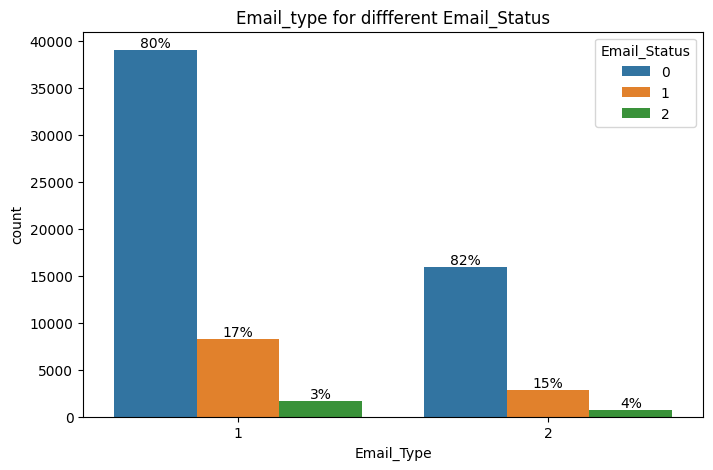

In [ ]:
# Chart - 4 visualization code
ax=sns.countplot(x=df['Email_Type'],hue=df["Email_Status"])
plt.title('Email_type for diffferent Email_Status')
barPerc(df,'Email_Type',ax)


##### 1. Why did you pick the specific chart?

**To do analysis of Email_type, countplot will give the category wise count in a figure.**

##### 2. What is/are the insight(s) found from the chart?

**There are more promotional emails than important emails i.e there are more 1s than 2s.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**As we can see from the plot that the relation of Email_type with Email_status is not so strong as the ratio being approximately same in each category.**

#### Chart - 5

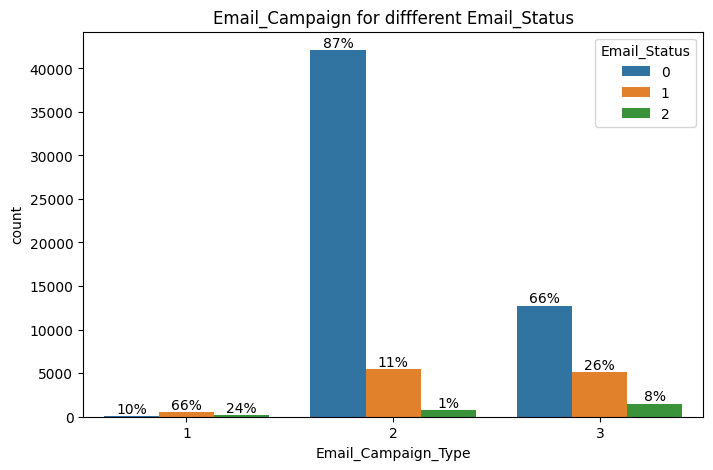

In [ ]:
# Chart - 5 visualization code
ax=sns.countplot(x=df['Email_Campaign_Type'],hue=df["Email_Status"])
plt.title('Email_Campaign for diffferent Email_Status')
barPerc(df,'Email_Campaign_Type',ax)


##### 1. Why did you pick the specific chart?

**To study the analysis of distribution of Email_Campaign_Type.**

##### 2. What is/are the insight(s) found from the chart?





**For email_campaign_type 1 there are more 2nd category of email_status which is uneven as generally Email_Status 1 category is maximum in rest other categories.**

#### Chart - 6

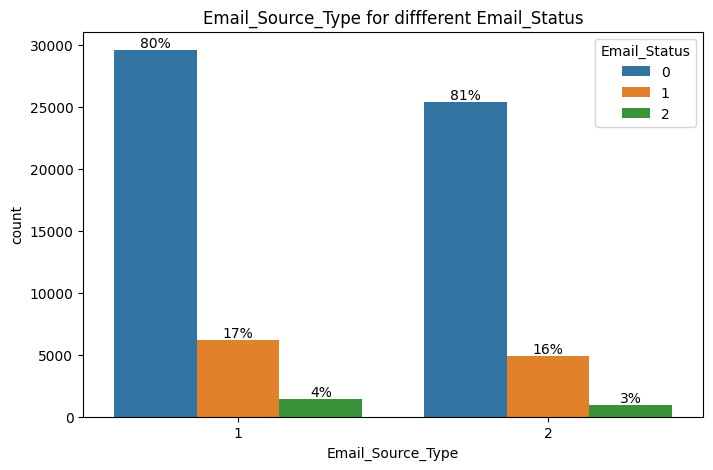

In [ ]:
# Chart - 6 visualization code
ax=sns.countplot(x=df['Email_Source_Type'],hue=df["Email_Status"])
plt.title('Email_Source_Type for diffferent Email_Status')
barPerc(df,'Email_Source_Type',ax)


##### 1. Why did you pick the specific chart?

**To analyse the Email_Source_Type**

##### 2. What is/are the insight(s) found from the chart?

**This seems totally normal, equally distributed categories counts also it is present in more or less in same ratio of categories of Email_Status. It is not much related to Email_Status so we can drop this column**

#### Chart - 7

Text(0.5, 1.0, 'Word_count Distribution')

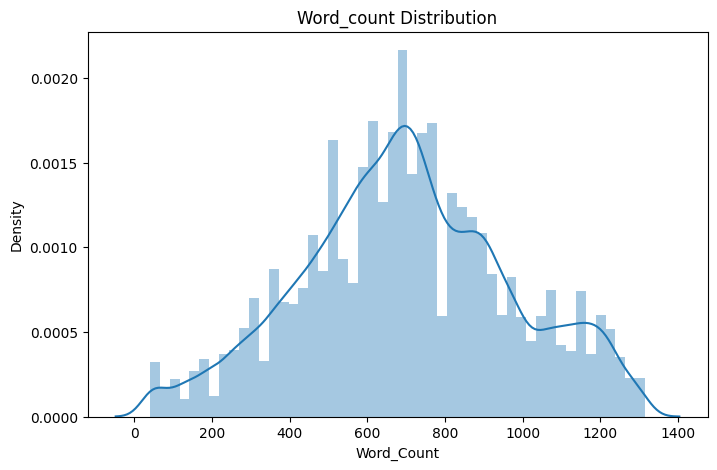

In [ ]:
# Chart - 7 visualization code
sns.distplot(df['Word_Count'],hist=True)
plt.title('Word_count Distribution')

##### 1. Why did you pick the specific chart?

**To study the Word_Count distribution.**

##### 2. What is/are the insight(s) found from the chart?

**More kind normaly distributed with average values arround 600-800.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In [ ]:
df.groupby(['Email_Status'])['Word_Count'].mean().reset_index()

,Email_Status,Word_Count
0,0,725.256785
1,1,590.939578
2,2,620.615255


**We can see that most of the values for Word_count which are ignored(0) are contain large word counts.**

*   longer emails no one like to read

#### Chart - 8

Text(0.5, 1.0, 'Total Images Distribution')

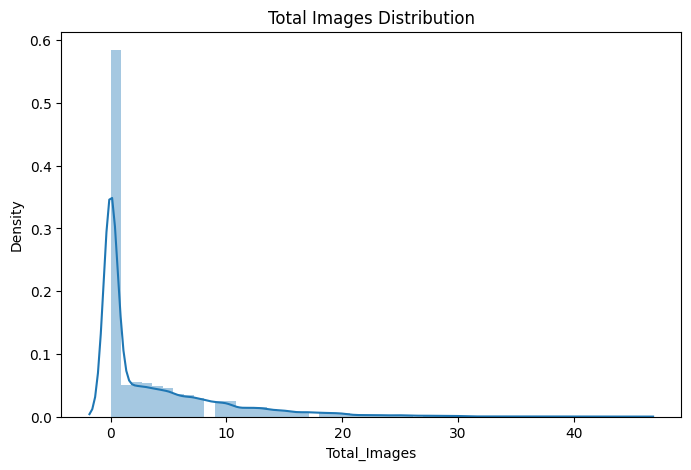

In [ ]:
# Chart - 8 visualization code
sns.distplot(df['Total_Images'])
plt.title('Total Images Distribution')

##### 1. Why did you pick the specific chart?

**To study the distribution of Total_Images.**

##### 2. What is/are the insight(s) found from the chart?

**Total_images is poitively skewed as maximum emails contain less number of images.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In [ ]:
df.groupby(['Email_Status'])['Total_Images'].mean().reset_index()

,Email_Status,Total_Images
0,0,3.617575
1,1,3.187361
2,2,3.690415


**There is not much relation among the Total_images and Email_Status.**

#### Chart - 9

Text(0.5, 1.0, 'Subject_Hotness_score Distribution')

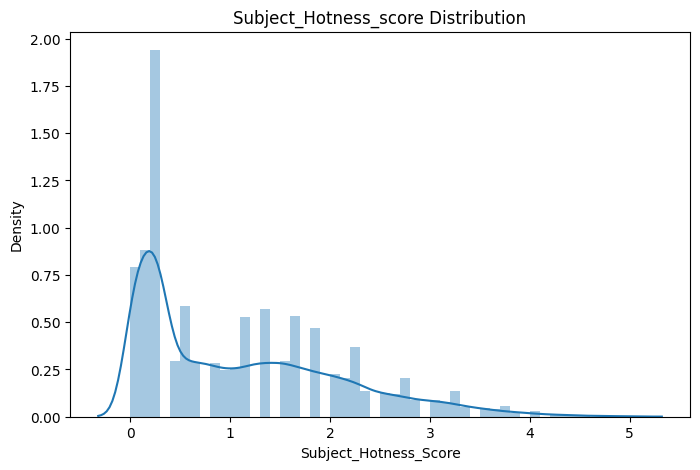

In [ ]:
# Chart - 9 visualization code
sns.distplot(df['Subject_Hotness_Score'])
plt.title('Subject_Hotness_score Distribution')

##### 1. Why did you pick the specific chart?

**To study the distribution of Subject_Hotness_score.**

##### 2. What is/are the insight(s) found from the chart?

**It is kind of positively skewed i.e most of the subject_hotness_score of the emails are low.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In [ ]:
df.groupby(['Email_Status'])['Subject_Hotness_Score'].median().reset_index()

,Email_Status,Subject_Hotness_Score
0,0,1.0
1,1,0.3
2,2,0.2


**Most of the emails which are ignored have high Subject_Hotness_Score.**

#### Chart - 10

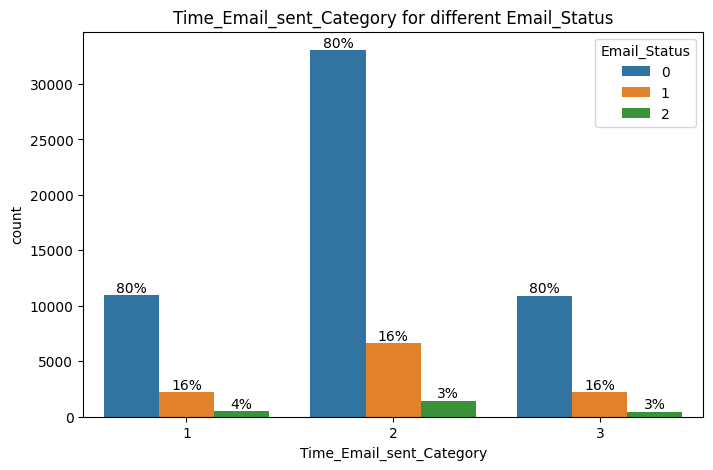

In [ ]:
# Chart - 10 visualization code
ax=sns.countplot(x=df['Time_Email_sent_Category'],hue=df['Email_Status'])
plt.title('Time_Email_sent_Category for different Email_Status')
barPerc(df,'Time_Email_sent_Category',ax)


##### 1. Why did you pick the specific chart?

**To study the time_email_sent_category for diffferent email_status and also the distribution of Time_email_sent_category.**

##### 2. What is/are the insight(s) found from the chart?

**Most of the emails are sent in the evening time.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**This does not seems to very related with email_status, the ratio seems to be same for each category so we can drop this column.**

#### Chart - 11

Text(0.5, 1.0, 'Email_satus distribution')

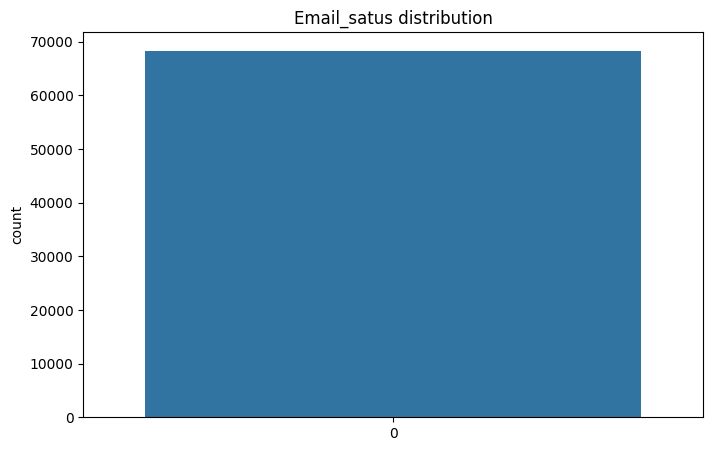

In [ ]:
# Chart - 11 visualization code
# analyis of dependent variable
sns.countplot(df['Email_Status'])
plt.title('Email_satus distribution')

##### 1. Why did you pick the specific chart?

**To study the distribution of dependent variable i.e Email_Status.**

##### 2. What is/are the insight(s) found from the chart?

**Clearly we can see that it is unbalanced with most values as 0. And very less number of 1 and 2s in the values.**

#### Chart - 12

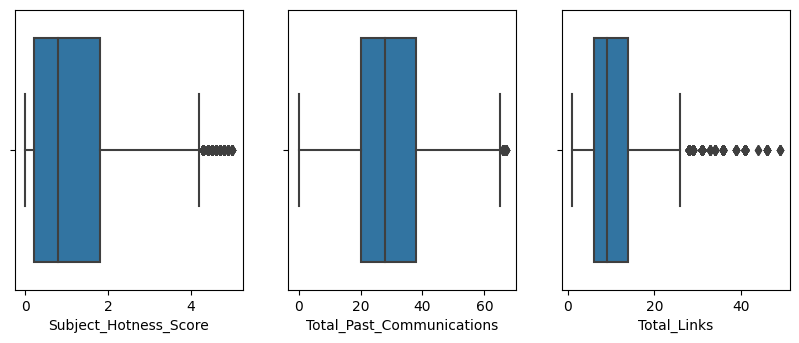

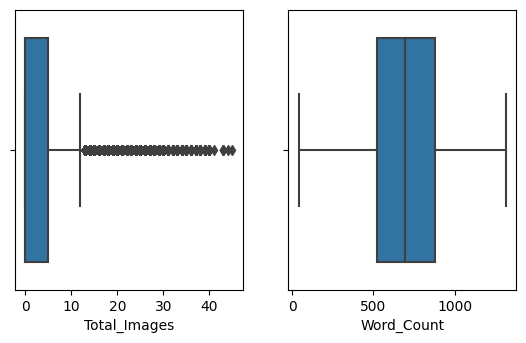

In [ ]:
# Chart - 12 visualization code
df_num = df.select_dtypes(include =['float']).copy()
df_num['Word_Count'] = df.loc[df_num.index, 'Word_Count'].copy()
idx = 1
fig = plt.figure(figsize = (10,8))
for col in list(df_num.columns):
    if idx <= 3:
            ax1 = fig.add_subplot(2,3,idx)
            sns.boxplot(data = df_num, x=col, ax = ax1)

    idx = idx +1
    if idx == 4:
        fig = plt.figure(figsize = (10,8))
        idx =1

##### 1. Why did you pick the specific chart?

**To analyse the outliers in the numerical variable.**

##### 2. What is/are the insight(s) found from the chart?

**Total_images,subject_hotness_score and total_links have outliers.**

#### Chart - 14 - Correlation Heatmap

<Axes: >

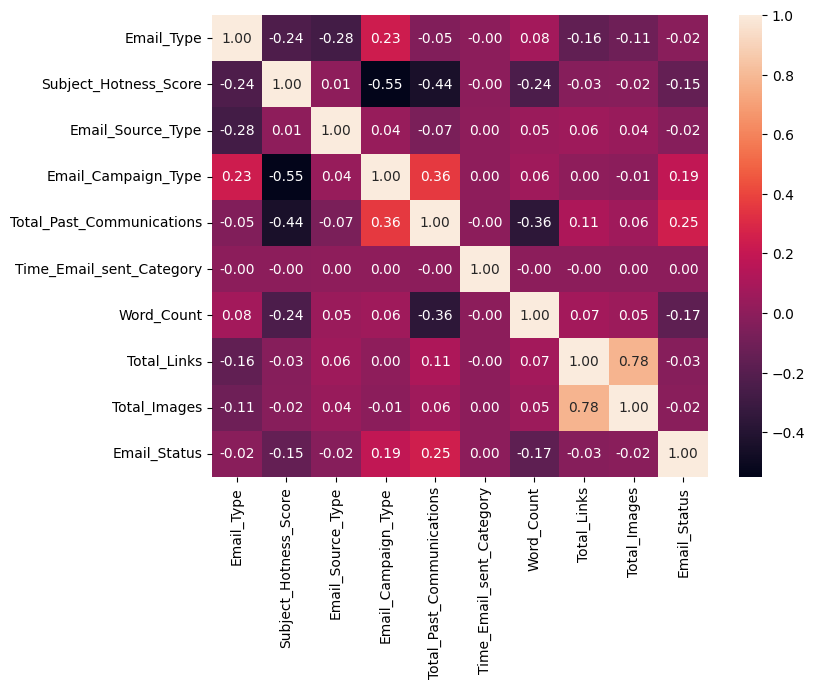

In [ ]:
# Correlation Heatmap visualization code
# heatmap for the continous variables  in order to understand the relationship with dependent variable
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f')


1. Why did you pick the specific chart?

**To study the correlation between all the variables.**

##### 2. What is/are the insight(s) found from the chart?

*   Total_Images and Total links are multicorrelated with values 0.78
*   subject_hotness_score and word_counts are negetively correlated with the dependent_variable Email_Status
*   Email_campaign_type and Total_past_communications are possitvely correlated to dependent variable Email_Status

#### Chart - 15 - Pair Plot

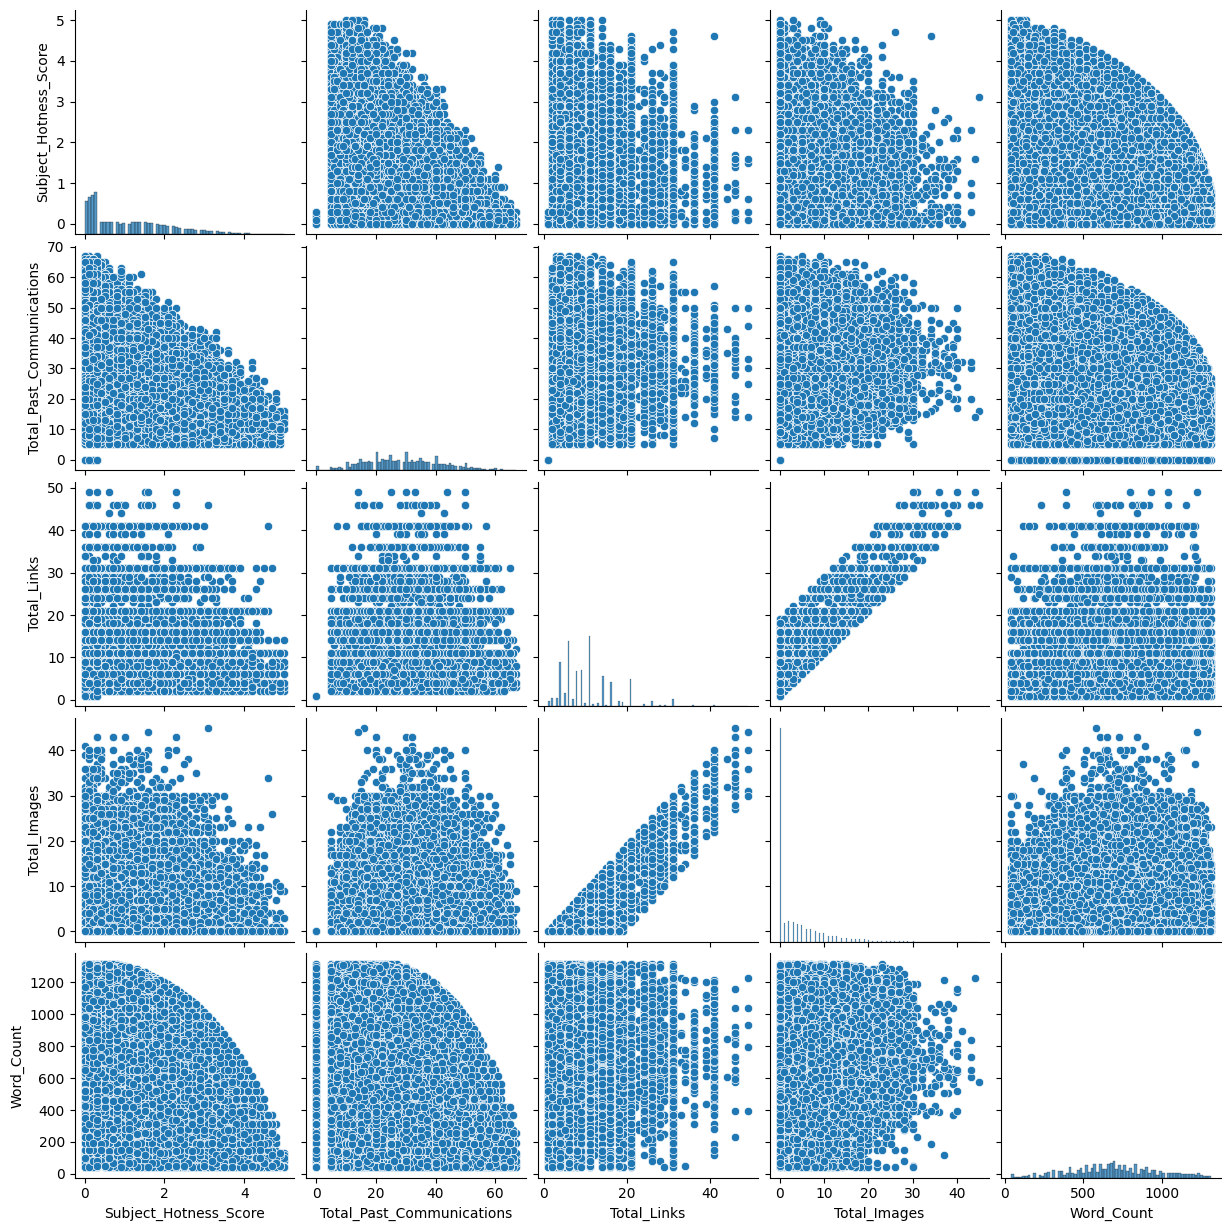

In [ ]:
# Pair Plot visualization code
sns.pairplot(df_num)

##### 1. Why did you pick the specific chart?

**To study the relation of relationship between variables,**

##### 2. What is/are the insight(s) found from the chart?

**Total_links and Total_Images are multicorrelated.**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Missing values were found in the columns



*   `Customer_Locattion`
*   `Total_past_Communications`
*   `Total_links`
*   `Total_Images`



As Customer_Location is not much related with email_Status so we are gona drop this column

In [ ]:
df.drop('Customer_Location',inplace=True,axis=1)

In [ ]:
# Handling Missing Values & Missing Value Imputation
df['Total_Links'].fillna(df['Total_Links'].mode()[0],inplace=True)
df['Total_Images'].fillna(df['Total_Images'].mode()[0],inplace=True)
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].median(),inplace=True)
df.isnull().sum()


Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

*  Imputing the missing values for the categorical data with Mode.
*  Imputing the missing values for the continuous data having outliers with the median value as median is roboust with outliers.

### 2. Handling Outliers

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Total_Links': {0: 1374, 1: 183, 2: 51}, 'Total_Images': {0: 4680, 1: 697, 2: 208}}


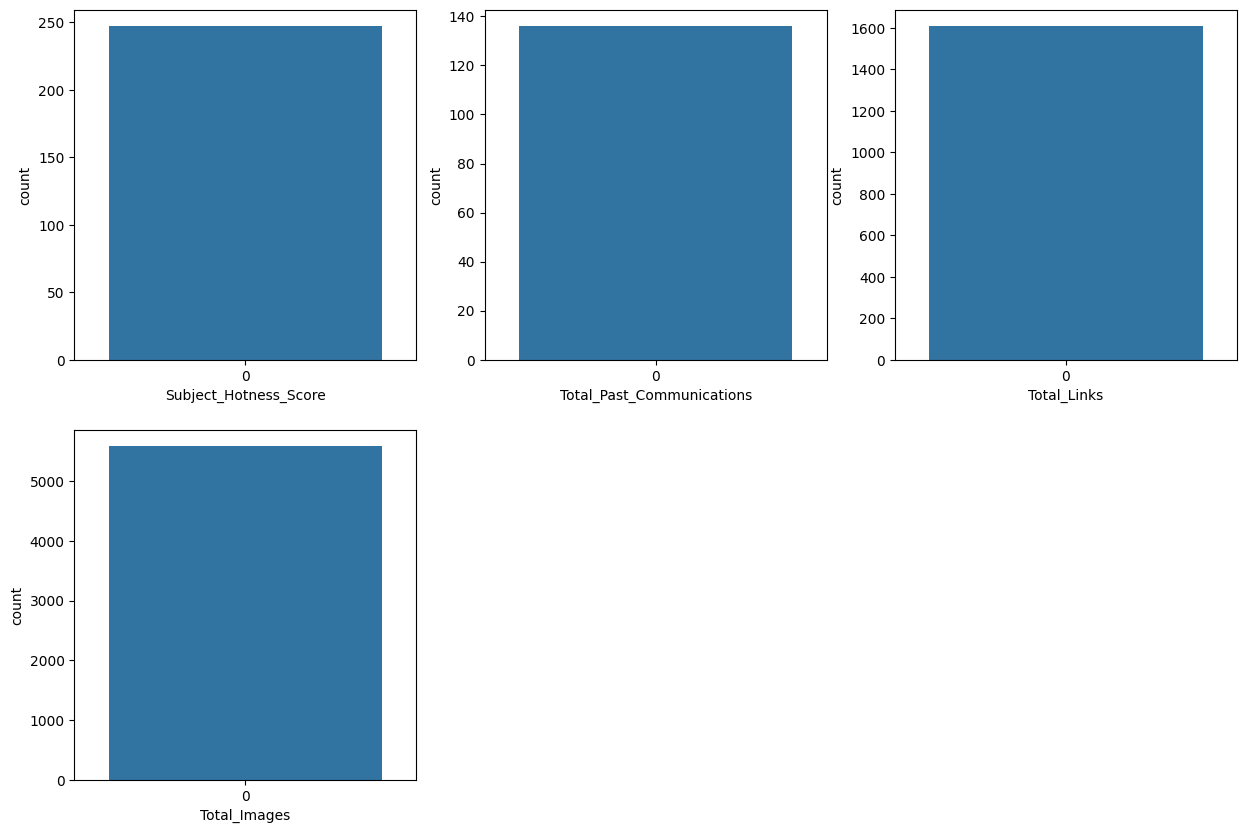

In [ ]:
# Handling Outliers & Outlier treatments

col_to_treat=['Subject_Hotness_Score','Total_Past_Communications','Total_Links','Total_Images']

fig = plt.figure(figsize = (15,10))
idx = 1

d={}
#iterating through each column which have outliers
for x in [y for y in col_to_treat]:
    #Finding Quartile
    Q3,Q1 = np.percentile(df.loc[:,x],[75,25])
    #Calculating Inter Quartile Range
    IQR = Q3-Q1
    #Fixing Boundaries for outliers
    max = Q3+(1.5*IQR)
    min = Q1-(1.5*IQR)

    #list y to store email_status of only outliers
    y=[]
    y=df.loc[df[x] < min]['Email_Status'].tolist()
    y.append(df.loc[df[x] > max]['Email_Status'].tolist())
    d[x]={}
    for i in y[0]:
      d[x][i] = d[x].get(i,0) + 1
    ax1 = fig.add_subplot(2,3,idx)
    sns.countplot(y[0],ax=ax1)
    plt.xlabel(x)
    idx = idx +1
print(d)


In [ ]:
minority_sum=0
majority_sum=0
for col in col_to_treat:
  minority_sum+=d[col][1]
  minority_sum+=d[col][2]
  majority_sum+=d[col][0]

total_for_1=df.groupby('Email_Status').count()['Email_Type'][1]
total_for_2=df.groupby('Email_Status').count()['Email_Type'][2]

total_for_minor=total_for_1+ total_for_2
total_for_majority=df.groupby('Email_Status').count()['Email_Type'][0]
print("Percentage of majority class having outliers = ",100*majority_sum/total_for_majority)
print("Percentage of minority class having outliers = ",100*minority_sum/total_for_minor)

Percentage of majority class having outliers =  11.450465044320271
Percentage of minority class having outliers =  9.580972263644497


##### What all outlier treatment techniques have you used and why did you use those techniques?

The outliers are removed if we found that dropping the outliers values wouldnt affect the minority class i.e Email_Status values 1 and 2 , here the majority class is Email_Status value 0.
*  As the percentage of data will be lost if we drop the outliers is more than 5% for minority class. **So we will not drop the outliers.**

### 3. Categorical Encoding

In [ ]:
df.columns

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
# Encode your categorical columns
categorical=['Email_Type',
 'Email_Source_Type',
 'Email_Campaign_Type',
 'Time_Email_sent_Category']

df = pd.get_dummies(df,columns=categorical,drop_first=True)
df.head(3)


,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Links,Total_Images,Email_Status,Email_Type_2,Email_Source_Type_2,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,2.2,33.0,440,8.0,0.0,0,0,1,1,0,0,0
1,2.1,15.0,504,5.0,0.0,0,1,0,1,0,1,0
2,0.1,36.0,962,5.0,0.0,1,1,0,0,1,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical  techniques that is used for  categorical encoding is dummification with k-1 variables to be safe from dummy trap.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

**As we know that total_links and total _images are multicorrelated
so we can construct feature based on both the variables, since dropping anyone variable is ambiguous as they have approximately same effects on the dependent variable**

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# as we know that total_links and total _images are multicorelated
# so we can construct feature based on both as droping anyone variable is ambiguous as they have approximately same effects on the dependent variable

df['email_attchments']=df['Total_Images'] + df['Total_Links']

#### 2. Feature Selection

In [ ]:
df.columns

Index(['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count',
       'Total_Links', 'Total_Images', 'Email_Status', 'Email_Type_2',
       'Email_Source_Type_2', 'Email_Campaign_Type_2', 'Email_Campaign_Type_3',
       'Time_Email_sent_Category_2', 'Time_Email_sent_Category_3',
       'email_attchments'],
      dtype='object')

In [ ]:
# Select your features wisely to avoid overfitting
from sklearn.feature_selection import chi2
p_val_f_val=chi2(df.drop('Email_Status',axis=1),df['Email_Status'])
p_val_f_val

(array([1.36579326e+03, 1.89292069e+04, 2.59026873e+05, 3.91608941e+02,
        4.87242798e+02, 3.92069627e+01, 2.38369041e+01, 1.54584125e+03,
        2.75522291e+03, 6.59315342e-02, 8.20735357e-01, 7.89795712e+02]),
 array([2.64096441e-297, 0.00000000e+000, 0.00000000e+000, 9.18753207e-086,
        1.57242820e-106, 3.06419371e-009, 6.66625672e-006, 0.00000000e+000,
        0.00000000e+000, 9.67571682e-001, 6.63406285e-001, 3.14804051e-172]))

In [ ]:
p_val=pd.Series(p_val_f_val[1])
p_val.index=df.drop('Email_Status',axis=1).columns
p_val.sort_index(ascending=False)

email_attchments              3.148041e-172
Word_Count                     0.000000e+00
Total_Past_Communications      0.000000e+00
Total_Links                    9.187532e-86
Total_Images                  1.572428e-106
Time_Email_sent_Category_3     6.634063e-01
Time_Email_sent_Category_2     9.675717e-01
Subject_Hotness_Score         2.640964e-297
Email_Type_2                   3.064194e-09
Email_Source_Type_2            6.666257e-06
Email_Campaign_Type_3          0.000000e+00
Email_Campaign_Type_2          0.000000e+00
dtype: float64

**Using Mutual Information Gain method to select features**

<Axes: >

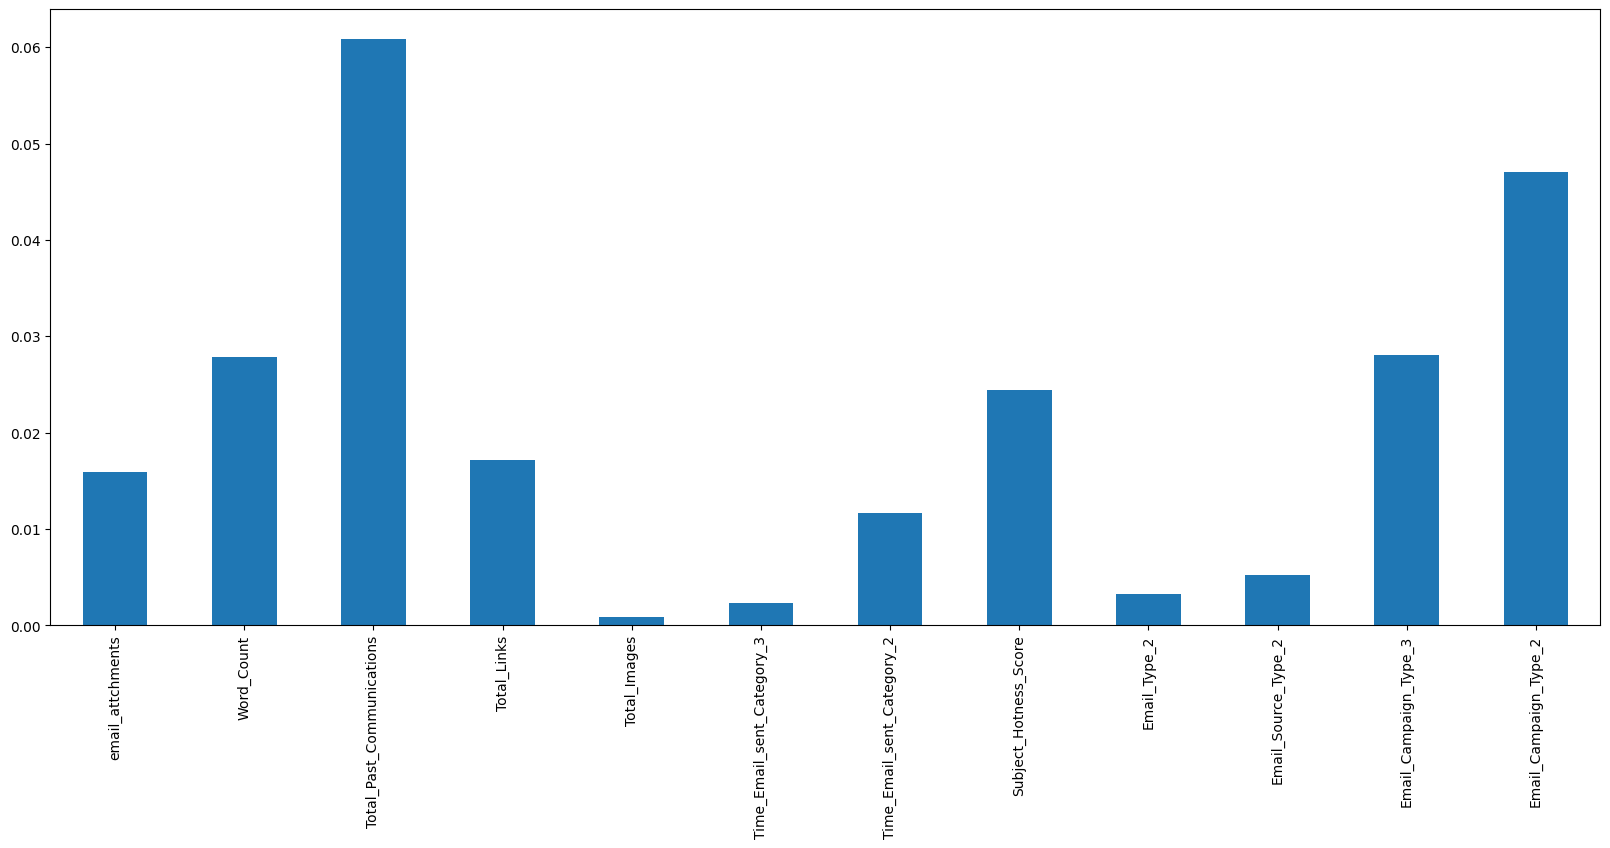

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_gain=mutual_info_classif(df.drop('Email_Status',axis=1),df['Email_Status'])
mutual_info_gain=pd.Series(mutual_info_gain)
mutual_info_gain.index=df.drop('Email_Status',axis=1).columns
mutual_info_gain.sort_index(ascending=False).plot.bar(figsize=(20,8))

##### What all feature selection methods have you used  and why?

**Using Chi Square method, the lesser the p_values are higher will be the importance**

**Mutual Information gain method is also used, higher the values of mutual_info_gain higher is the importance.**



*   **Based on all this techniques we selected our features as**

1. email_attachments
2. Total_Past_Communications
3. Subject_Hotness_Score
4. Email_source_type
5. Email_Campaign_Type
6. Word_Count



*   **We would like to drop**
1. Total_Images
2. Total_links
3. Time_Email_sent_Category
4. Email_Type




In [ ]:
drop=['Email_Type_2','Time_Email_sent_Category_2','Time_Email_sent_Category_3','Total_Images','Total_Links']
df.drop(drop,inplace=True,axis=1)

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Not required

### 6. Data Scaling

In [ ]:
# Scaling your data
numerical_column=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','email_attchments']
for col in numerical_column:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

df.head(3)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Email_Source_Type_2,Email_Campaign_Type_2,Email_Campaign_Type_3,email_attchments
0,0.44,0.492537,0.313480,0,1,1,0,0.076087
1,0.42,0.223881,0.363636,0,0,1,0,0.043478
2,0.02,0.537313,0.722571,1,0,0,1,0.043478


##### Which method have you used to scale you data and why?


*  **Normalization technique Min - Max Scalling** is applied here as it scales the data between 0 to 1 it would scale down the different facotor ranges to 0 to 1 so that they all have equal importance during the Weight Updation

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**For this problem dimensionality reduction is not required as we dont have much dimension**

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

X=df.drop('Email_Status',axis=1)
y=df['Email_Status']

print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {y.shape}')

Shape of X: (68353, 7)
Shape of Y: (68353,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3,stratify=y)


##### What data splitting ratio have you used and why?

**Stratified Random Sampling as the dependent variable is imbalanced, Stratified Random Sampling selects random samples from each class equally.**

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

**Upsampling is required as our data is highly imbalanced**
*   **As we have 3 categories of dependent variable among which class 0 is high and other two classes are very less**

### **Random Under Sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(X_train,y_train)

print('Original dataset shape:', X_train.shape)
print('Resampled dataset shape', len(y_rus))


Original dataset shape: (54682, 7)
Resampled dataset shape 5694


### **SMOTE-Upsampling technique**

In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train,y_train)

print('Original dataset shape', X_train.shape)
print('Resampled dataset shape', len(y_smote))

Original dataset shape (54682, 7)
Resampled dataset shape 131859


### **SMOTETomek**

In [ ]:
from imblearn.combine import SMOTETomek
counter= Counter(y_train)
print('Before',counter)
smtom=SMOTETomek(random_state=1)
x_smtom,y_smtom=smtom.fit_resample(X_train,y_train)
counter = Counter(y_smtom)
print('After',counter)


Before Counter({0: 43953, 1: 8831, 2: 1898})
After Counter({2: 43245, 1: 42321, 0: 42225})


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

### **Techniques that are used to handle the imbalance dataset are**

*   **RANDOM UNDER SAMPLING**

This is a Undersampling Technique.Here the majority class is reduced to the minimum number of members for minority class , and this process of deleting instances is done randomly .Therefore this process is known as Random Under Sampling. This process can be repeated until the desired class distribution is achieved , like for getting upto equal number of classes

*   **SMOTE** (Synthetic Minority Oversampling Technique)

It is smart way of increasing the number of samples for the minority classes , its better than duplicating the instances from the minority class it uses synthetic generation of instances from the minority classes. The instances formed newly are samples of the feature space for each target class and its nearest neighbour .

here is the the visualization of how the synthetic data is generated


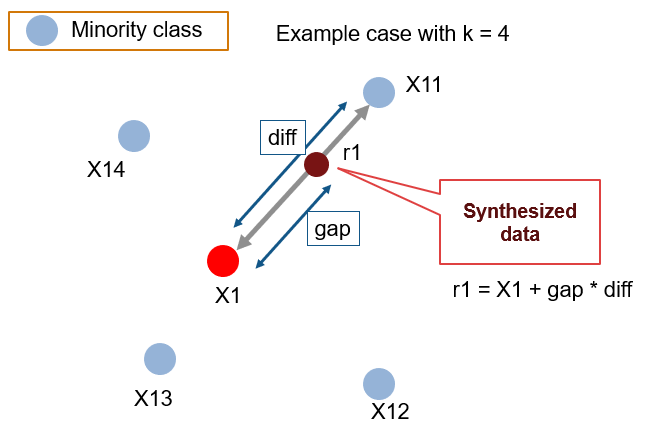

*   source[click here](https://editor.analyticsvidhya.com/uploads/77417image1.png)









.



.




*    **SMOTETomek**

Here the new concept of **tomeklinks** is combined with SMOTE to create hybridisation of algorithm .It combines both undersampling(tomek links) and Oversampling(SMOTE). Tomek links are created when the two intances of opposite classes are their  own nearest neighbours or simply we can say its the pair of instances which are very close together

## ***7. ML Model Implementation***

### ML Model - **Decision Trees Classifier**

#### **Defining General Evaluation Process**

In [ ]:
col_names=['MODEL_NAME','F1_SCORE_Train','PRECISION_Train','RECALL__Train','ACCURACY_Train','ROC_AUC_Train','F1_SCORE_Test','PRECISION_Test','RECALL__Test','ACCURACY_Test','ROC_AUC_Test']
All_model=pd.DataFrame(columns=col_names)
# defining the general evaluation system for all the models
def evaluate_model(model,X_train,y_train,X_test,y_test,model_name):
  '''Function for evaluating all the models'''
  global col_names

  # prediction values for training and testing data
  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)

  # probability values on train and test
  train_preds = model.predict_proba(X_train)
  test_preds = model.predict_proba(X_test)

  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(y_train,train_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)

  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(y_train,train_class_preds)
  test_cm = confusion_matrix(y_test,test_class_preds )


  # Get the Recall for train and test
  train_recall = recall_score(y_train, train_class_preds, average='weighted')
  test_recall = recall_score(y_test, test_class_preds, average='weighted')

  # Get the precision for train and test
  train_precision = precision_score(y_train, train_class_preds, average='weighted')
  test_precision = precision_score(y_test, test_class_preds, average='weighted')

  # Get the f1 Score for train and test
  train_f1score = f1_score(y_train, train_class_preds, average='weighted')
  test_f1score = f1_score(y_test, test_class_preds, average='weighted')

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(y_train,train_preds,multi_class = 'ovr')
  test_auc = roc_auc_score(y_test,test_preds,multi_class = 'ovr')

  list_of_different_score_measures=[model_name,train_f1score,train_precision,train_recall,train_accuracy,train_auc,test_f1score,test_precision,test_recall,test_accuracy,test_auc]
  results = {col_names[item]: list_of_different_score_measures[item] for item in range(len(col_names))}


  print("----- Evaluation on train data -----\n")
  print("Confusion matrix \n")
  print(train_cm)
  print("\n Accuracy = ",train_accuracy)
  print("\n Recall = ",train_recall)
  print("\n Precision = ",train_precision)
  print("\n F1 score = ",train_f1score)
  print("\n Roc_Auc score = ",train_auc)

  print("\n\n----- Evaluation on test data -----\n")
  print("Confusion matrix \n")
  print(test_cm)
  print("\n Accuracy = ",test_accuracy)
  print("\n Recall = ",test_recall)
  print("\n Precision = ",test_precision)
  print("\n F1 score = ",test_f1score)
  print("\n Roc_Auc score = ",test_auc)

  fpr = {}
  tpr = {}
  thresh ={}
  n_class=3
  for i in range(n_class):
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend()
  return results

### **Decision Tree with Original Data**

----- Evaluation on train data -----

Confusion matrix 

[[43947     6     0]
 [  180  8647     4]
 [   56    58  1784]]

 Accuracy =  0.9944405837387075

 Recall =  0.9944405837387075

 Precision =  0.9944424270856819

 F1 score =  0.9943986466454434

 Roc_Auc score =  0.9999307906727318


----- Evaluation on test data -----

Confusion matrix 

[[9094 1616  278]
 [1384  664  160]
 [ 278  151   46]]

 Accuracy =  0.7171384682905421

 Recall =  0.7171384682905421

 Precision =  0.7269685058701457

 F1 score =  0.7218695622610338

 Roc_Auc score =  0.5717333215507222


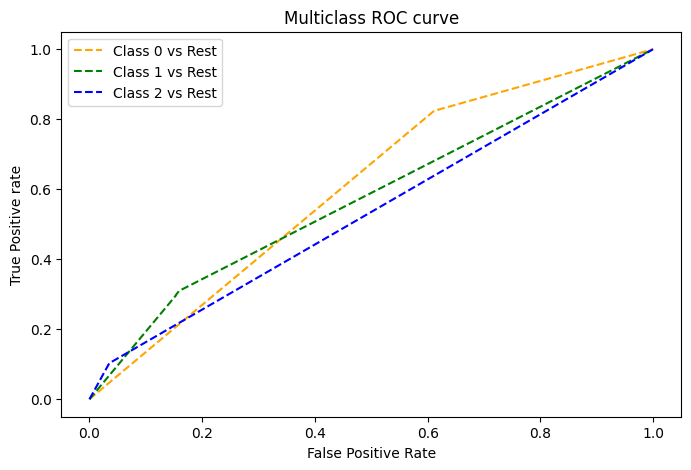

In [ ]:
# ML Model - 1 Implementation
# defining empty dictionary for holding the results
final_dict={}

DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train,y_train)
# Fit the Algorithm
DT_classifier.fit(X_train,y_train)
# Predict on the model

result=evaluate_model(DT_classifier,X_train,y_train,X_test,y_test,'Decision_Tree_On_Original_data_with_default_parameters')
final_dict['Decision_Tree_On_Original_data_with_default_parameters']=result


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
final_dict['Decision_Tree_On_Original_data_with_default_parameters']

{'MODEL_NAME': 'Decision_Tree_On_Original_data_with_default_parameters',
 'F1_SCORE_Train': 0.9943986466454434,
 'PRECISION_Train': 0.9944424270856819,
 'RECALL__Train': 0.9944405837387075,
 'ACCURACY_Train': 0.9944405837387075,
 'ROC_AUC_Train': 0.9999307906727318,
 'F1_SCORE_Test': 0.7218695622610338,
 'PRECISION_Test': 0.7269685058701457,
 'RECALL__Test': 0.7171384682905421,
 'ACCURACY_Test': 0.7171384682905421,
 'ROC_AUC_Test': 0.5717333215507222}

### **Decision tree with Random Under Sampling**

----- Evaluation on train data -----

Confusion matrix 

[[1898    0    0]
 [   3 1895    0]
 [   2    7 1889]]

 Accuracy =  0.9978925184404637

 Recall =  0.9978925184404637

 Precision =  0.9978974110463324

 F1 score =  0.9978921421294408

 Roc_Auc score =  0.999995188398266


----- Evaluation on test data -----

Confusion matrix 

[[5537 3129 2322]
 [ 630  751  827]
 [ 113  148  214]]

 Accuracy =  0.47560529588179357

 Recall =  0.47560529588179357

 Precision =  0.740976001810363

 F1 score =  0.5582190503059963

 Roc_Auc score =  0.5828541698369148


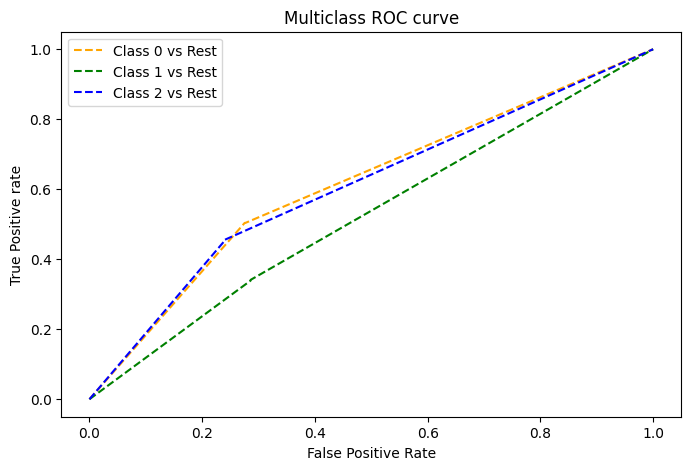

In [ ]:

DT_classifier_rus = DecisionTreeClassifier()

# Fit the Algorithm
DT_classifier_rus.fit(x_rus,y_rus)
# Predict on the model

result=evaluate_model(DT_classifier_rus,x_rus,y_rus,X_test,y_test,'Decision_Tree_Random_undersampling_with_default_parameters')
final_dict['Decision_Tree_Random_undersampling_with_default_parameters']=result

### **Decision Tree with SMOTE data**

----- Evaluation on train data -----

Confusion matrix 

[[43947     6     0]
 [  180 43769     4]
 [   56    58 43839]]

 Accuracy =  0.9976945070112772

 Recall =  0.9976945070112772

 Precision =  0.9977024191032958

 F1 score =  0.997695055608879

 Roc_Auc score =  0.9999942037048868


----- Evaluation on test data -----

Confusion matrix 

[[8876 1698  414]
 [1315  677  216]
 [ 256  153   66]]

 Accuracy =  0.7036061736522566

 Recall =  0.7036061736522566

 Precision =  0.7294266951481773

 F1 score =  0.7157357137687648

 Roc_Auc score =  0.5784008822788325


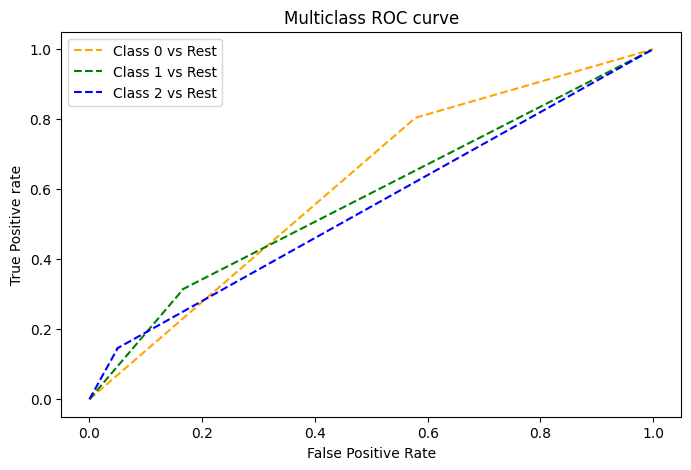

In [ ]:

DT_classifier = DecisionTreeClassifier()

# Fit the Algorithm
DT_classifier.fit(x_smote,y_smote)
# Predict on the model

result=evaluate_model(DT_classifier,x_smote,y_smote,X_test,y_test,'Decision_Tree_On_SMOTE_data_with_default_parameters')
final_dict['Decision_Tree_On_SMOTE_data_with_default_parameters']=result

### **Decision tree with SMOTETomek data**

----- Evaluation on train data -----

Confusion matrix 

[[42219     6     0]
 [  180 42137     4]
 [   56    58 43131]]

 Accuracy =  0.9976211157280247

 Recall =  0.9976211157280247

 Precision =  0.997629616666795

 F1 score =  0.9976217219292408

 Roc_Auc score =  0.9999938313167772


----- Evaluation on test data -----

Confusion matrix 

[[8819 1738  431]
 [1312  680  216]
 [ 269  146   60]]

 Accuracy =  0.699217321337137

 Recall =  0.699217321337137

 Precision =  0.7273432001816376

 F1 score =  0.7123799648518035

 Roc_Auc score =  0.5749343169500424


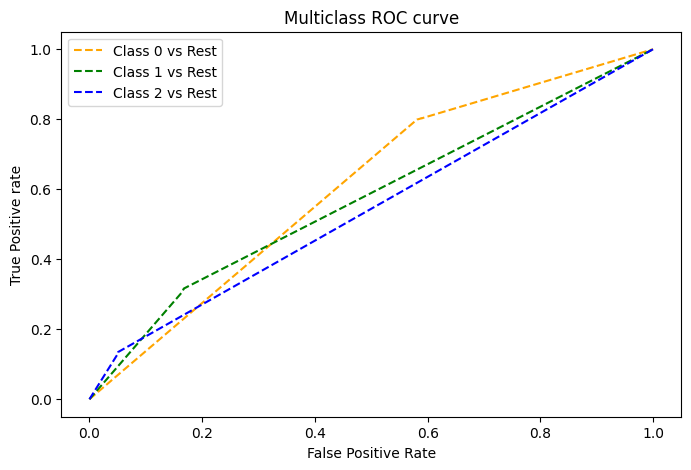

In [ ]:

DT_classifier = DecisionTreeClassifier()

# Fit the Algorithm
DT_classifier.fit(x_smtom,y_smtom)
# Predict on the model

result=evaluate_model(DT_classifier,x_smtom,y_smtom,X_test,y_test,'Decision_Tree_On_SMOTETomek_data_with_default_parameters')
final_dict['Decision_Tree_On_SMOTETomek_data_with_default_parameters']=result

#### 2. **Cross- Validation & Hyperparameter Tuning**

### **Hypertunning Decision Tree with Original Data**

Fitting 3 folds for each of 198 candidates, totalling 594 fits
----- Evaluation on train data -----

Confusion matrix 

[[43387   561     5]
 [ 7687  1131    13]
 [ 1557   266    75]]

 Accuracy =  0.815496872828353

 Recall =  0.815496872828353

 Precision =  0.7838938542854086

 F1 score =  0.7586261239383627

 Roc_Auc score =  0.8032437343683502


----- Evaluation on test data -----

Confusion matrix 

[[10797   189     2]
 [ 1986   210    12]
 [  406    63     6]]

 Accuracy =  0.8055738424402019

 Recall =  0.8055738424402019

 Precision =  0.7418123687268866

 F1 score =  0.7441237068953599

 Roc_Auc score =  0.7513670044982373


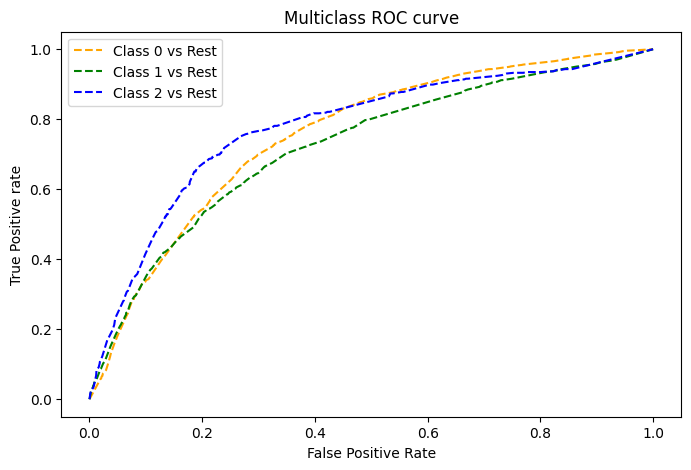

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
DT_optimized_original = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]},
    n_iter = 250, cv = 3, verbose=2, random_state=42, n_jobs = -1,
    scoring='roc_auc'
)
DT_optimized_original.fit(X_train,y_train)
# best parameters
DT_optimized_original_best_params=DT_optimized_original.best_params_
# Fit the Algorithm
DT_optimized_original_data = DecisionTreeClassifier(min_samples_split=DT_optimized_original_best_params['min_samples_split'],
                                 max_depth=DT_optimized_original_best_params['max_depth'],
                                 min_samples_leaf=DT_optimized_original_best_params['min_samples_leaf'],
                                 max_features=DT_optimized_original_best_params['max_features'],
                                 random_state=0)
DT_optimized_original_data.fit(X_train,y_train)
# Predict on the model

result=evaluate_model(DT_optimized_original_data,X_train,y_train,X_test,y_test,'Decision_Tree_Optimized_Original_data')
final_dict['Decision_Tree_Optimized_Original_data']=result

### **Hypertunning Decision Tree with Random Undersampling**

Fitting 3 folds for each of 198 candidates, totalling 594 fits
----- Evaluation on train data -----

Confusion matrix 

[[1305  311  282]
 [ 331  979  588]
 [ 225  364 1309]]

 Accuracy =  0.6310151036178433

 Recall =  0.6310151036178433

 Precision =  0.6312895348380391

 F1 score =  0.6292370552231874

 Roc_Auc score =  0.8221524200691168


----- Evaluation on test data -----

Confusion matrix 

[[6320 2704 1964]
 [ 562  715  931]
 [  74  122  279]]

 Accuracy =  0.5350010972130788

 Recall =  0.5350010972130788

 Precision =  0.7659235035683041

 F1 score =  0.6116560556937649

 Roc_Auc score =  0.6845991595667571


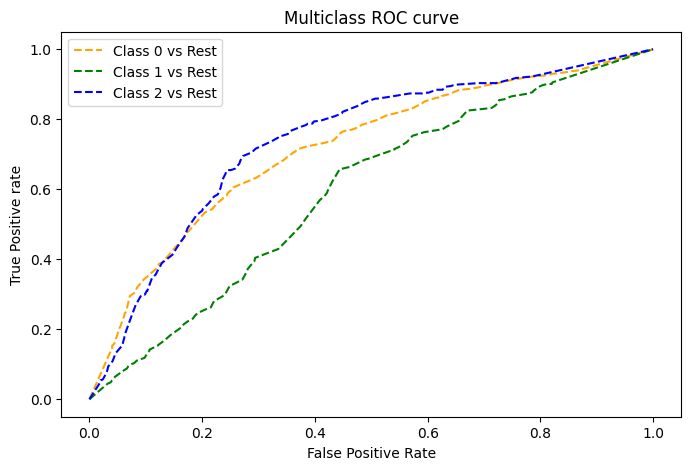

In [ ]:
DT_optimized_rus = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]},
    n_iter = 250, cv = 3, verbose=2, random_state=42, n_jobs = -1,
    scoring='roc_auc'
)
DT_optimized_rus.fit(x_rus,y_rus)
# best parameters
DT_optimized_rus_best_params=DT_optimized_rus.best_params_
# Fit the Algorithm
DT_optimized_rus_data = DecisionTreeClassifier(min_samples_split=DT_optimized_rus_best_params['min_samples_split'],
                                 max_depth=DT_optimized_rus_best_params['max_depth'],
                                 min_samples_leaf=DT_optimized_rus_best_params['min_samples_leaf'],
                                 max_features=DT_optimized_rus_best_params['max_features'],
                                 random_state=0)
DT_optimized_rus_data.fit(x_rus,y_rus)
# Predict on the model

result=evaluate_model(DT_optimized_rus_data,x_rus,y_rus,X_test,y_test,'Deciosion_Tree_optimized_random_undersampling_data')
final_dict['Decision_Tree_optimized_random_undersampling_data']=result

### **Hypertunning Decision Tree with SMOTETomek**

Fitting 3 folds for each of 198 candidates, totalling 594 fits
----- Evaluation on train data -----

Confusion matrix 

[[31292  7020  3913]
 [11137 16776 14408]
 [ 6154  8985 28106]]

 Accuracy =  0.5960826662284512

 Recall =  0.5960826662284512

 Precision =  0.5871674935088292

 F1 score =  0.5878092731359587

 Roc_Auc score =  0.7802576320496031


----- Evaluation on test data -----

Confusion matrix 

[[8059 1877 1052]
 [ 803  773  632]
 [ 109  156  210]]

 Accuracy =  0.6614000438885231

 Recall =  0.6614000438885231

 Precision =  0.7703809933141882

 F1 score =  0.7050281470156395

 Roc_Auc score =  0.7281291969772621


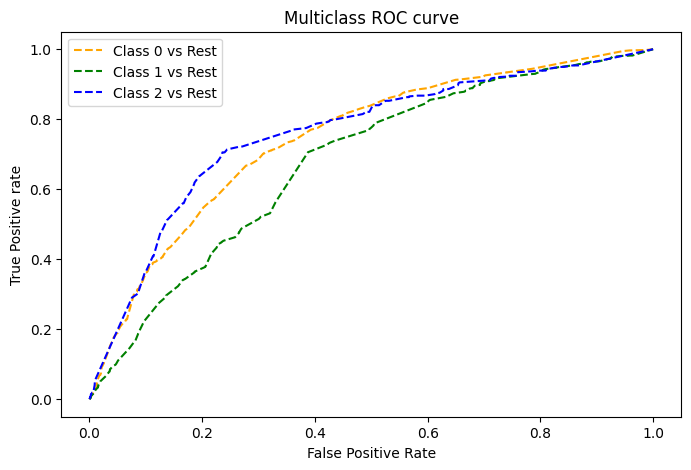

In [ ]:
DT_optimized_SMOTETomek = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]},
    n_iter = 250, cv = 3, verbose=2, random_state=42, n_jobs = -1,
    scoring='roc_auc'
)
DT_optimized_SMOTETomek.fit(x_smtom,y_smtom)
# best parameters
DT_optimized_SMOTETomek_best_params=DT_optimized_SMOTETomek.best_params_
# Fit the Algorithm
DT_optimized_SMOTETomek_data = DecisionTreeClassifier(min_samples_split=DT_optimized_SMOTETomek_best_params['min_samples_split'],
                                 max_depth=DT_optimized_SMOTETomek_best_params['max_depth'],
                                 min_samples_leaf=DT_optimized_SMOTETomek_best_params['min_samples_leaf'],
                                 max_features=DT_optimized_SMOTETomek_best_params['max_features'],
                                 random_state=0)
DT_optimized_SMOTETomek_data.fit(x_smtom,y_smtom)
# Predict on the model

result=evaluate_model(DT_optimized_SMOTETomek_data,x_smtom,y_smtom,X_test,y_test,'Deciosion_Tree_optimized_SMOTETomek_data')
final_dict['Decision_Tree_optimized_SMOTETomek_data']=result

### **Hypertunning Decision Tree with SMOTE**

Fitting 3 folds for each of 198 candidates, totalling 594 fits
----- Evaluation on train data -----

Confusion matrix 

[[33748  4738  5467]
 [12786 13694 17473]
 [ 6089  5146 32718]]

 Accuracy =  0.6079220986053284

 Recall =  0.6079220986053284

 Precision =  0.6033174048536972

 F1 score =  0.5871224281258508

 Roc_Auc score =  0.7888263747599235


----- Evaluation on test data -----

Confusion matrix 

[[8450 1132 1406]
 [ 917  525  766]
 [ 122  107  246]]

 Accuracy =  0.6744934532952966

 Recall =  0.6744934532952966

 Precision =  0.7673421554327626

 F1 score =  0.7119480282943502

 Roc_Auc score =  0.7214619261177777


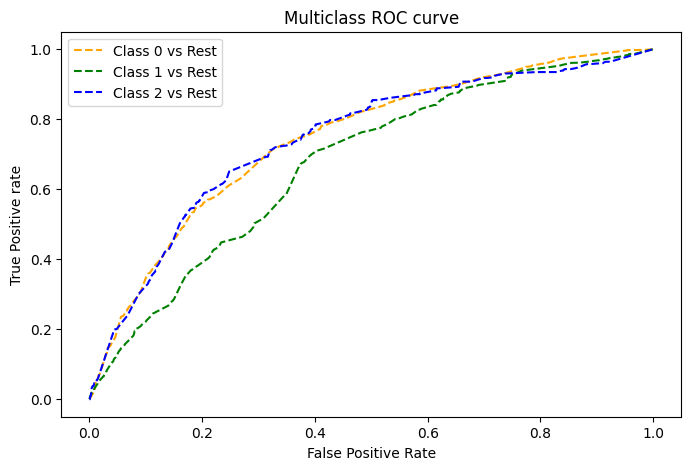

In [ ]:
DT_optimized_SMOTE = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]},
    n_iter = 250, cv = 3, verbose=2, random_state=42, n_jobs = -1,
    scoring='roc_auc'
)
DT_optimized_SMOTE.fit(x_smote,y_smote)
# best parameters
DT_optimized_SMOTE_best_params=DT_optimized_SMOTE.best_params_
# Fit the Algorithm
DT_optimized_SMOTE_data = DecisionTreeClassifier(min_samples_split=DT_optimized_SMOTE_best_params['min_samples_split'],
                                 max_depth=DT_optimized_SMOTE_best_params['max_depth'],
                                 min_samples_leaf=DT_optimized_SMOTE_best_params['min_samples_leaf'],
                                 max_features=DT_optimized_SMOTE_best_params['max_features'],
                                 random_state=0)
DT_optimized_SMOTE_data.fit(x_smote,y_smote)
# Predict on the model

result=evaluate_model(DT_optimized_SMOTE_data,x_smote,y_smote,X_test,y_test,'Decision_Tree_Optimized_SMOTE_data')
final_dict['Decision_Tree_Optimized_SMOTE_data']=result

##### Which hyperparameter optimization technique have you used and why?

**We have used RandomisedSearchCV as it randomly select from all possible combination of the params grid and check until the number of iterations inputed by us. So its easy for us implement as we dont have much time to check every possible combinations.**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after the hypertunning we have seen a improvement on the following models

* Decision Tree on original data F1 score has been increased 0.7220 to 0.7441 i.e 2.21 % increase in F1 score.

* And, for the Decision tree on Randon Undersampling the F1 score has been increased from 0.5609 to 0.6116 approximately 5% has been increased in F1 score.

### **ML Model - RANDOM FOREST CLASSIFIER**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### **Random Forest with Original data**

----- Evaluation on train data -----

Confusion matrix 

[[43884    55    14]
 [  132  8680    19]
 [   41    45  1812]]

 Accuracy =  0.9944040086317253

 Recall =  0.9944040086317253

 Precision =  0.9943835182870011

 F1 score =  0.9943845696959952

 Roc_Auc score =  0.9998605750326982


----- Evaluation on test data -----

Confusion matrix 

[[10435   517    36]
 [ 1720   434    54]
 [  346   113    16]]

 Accuracy =  0.7962109575012801

 Recall =  0.7962109575012801

 Precision =  0.742036305190844

 F1 score =  0.7588875440318033

 Roc_Auc score =  0.726760363483427


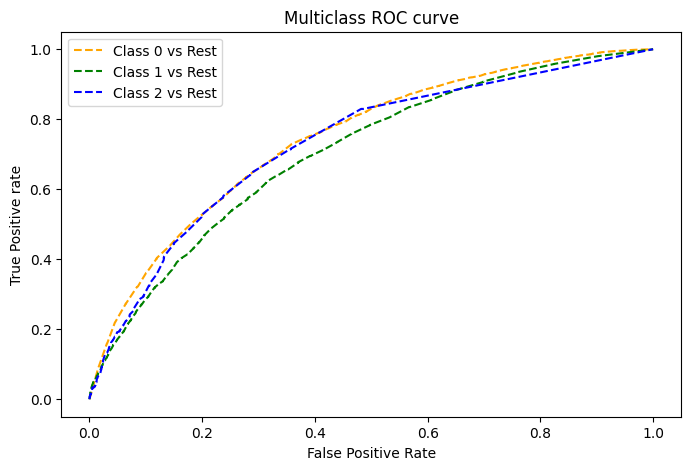

In [ ]:
rf_default_original = RandomForestClassifier(random_state = 42)
rf_default_original.fit(X_train,y_train)

result=evaluate_model(rf_default_original,X_train,y_train,X_test,y_test,'Random_forest_default_Original_data')
final_dict['Random_forest_default_Original_data']=result

# Visualizing evaluation Metric Score chart

### **Random Forest on Random Undersampling**

----- Evaluation on train data -----

Confusion matrix 

[[1895    1    2]
 [   2 1892    4]
 [   0    3 1895]]

 Accuracy =  0.9978925184404637

 Recall =  0.9978925184404637

 Precision =  0.9978932551800392

 F1 score =  0.9978925639382782

 Roc_Auc score =  0.999987508341652


----- Evaluation on test data -----

Confusion matrix 

[[6900 2339 1749]
 [ 631  734  843]
 [  83  132  260]]

 Accuracy =  0.5774266695925682

 Recall =  0.5774266695925682

 Precision =  0.768530264722459

 F1 score =  0.6454947673170026

 Roc_Auc score =  0.7107412447775435


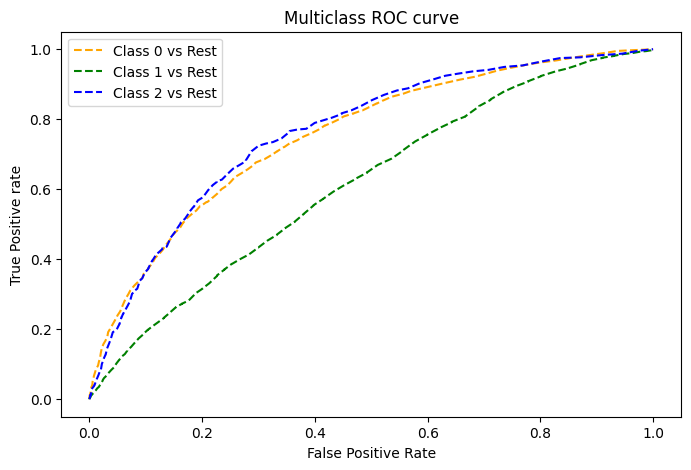

In [ ]:
rf_default_rus = RandomForestClassifier(random_state = 42)
rf_default_rus.fit(x_rus,y_rus)

result=evaluate_model(rf_default_rus,x_rus,y_rus,X_test,y_test,'Random_forest_default_random_undersampling_data')
final_dict['Random_forest_default_random_undersampling_data']=result

### **Random Forest on  SMOTE**

----- Evaluation on train data -----

Confusion matrix 

[[43837    83    33]
 [  102 43820    31]
 [   23    33 43897]]

 Accuracy =  0.9976869231527616

 Recall =  0.9976869231527616

 Precision =  0.9976868651628064

 F1 score =  0.9976868754817511

 Roc_Auc score =  0.9999648404309692


----- Evaluation on test data -----

Confusion matrix 

[[9814  973  201]
 [1449  595  164]
 [ 279  153   43]]

 Accuracy =  0.7645380732938336

 Recall =  0.7645380732938336

 Precision =  0.7429136868354643

 F1 score =  0.7525193717274253

 Roc_Auc score =  0.7122474873106327


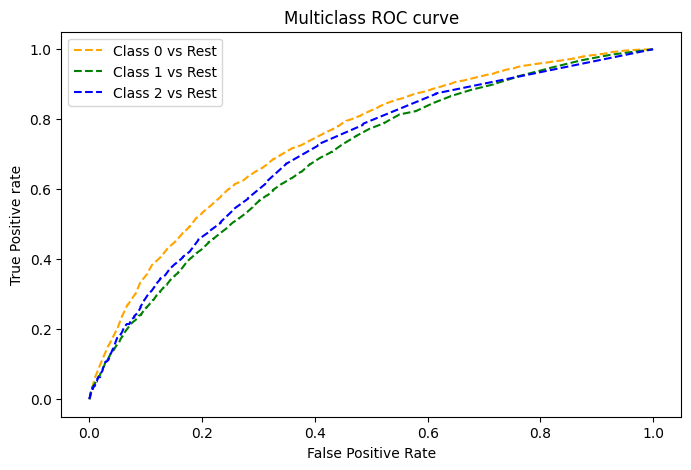

In [ ]:
rf_default_smote = RandomForestClassifier(random_state = 42)
rf_default_smote.fit(x_smote,y_smote)

result=evaluate_model(rf_default_smote,x_smote,y_smote,X_test,y_test,'Random_forest_default_SMOTE_data')
final_dict['Random_forest_default_SMOTE_data']=result

### **Random Forest on  SMOTETomek**

----- Evaluation on train data -----

Confusion matrix 

[[42103    94    28]
 [   93 42200    28]
 [   26    36 43183]]

 Accuracy =  0.9976132904508143

 Recall =  0.9976132904508143

 Precision =  0.9976133797677574

 F1 score =  0.9976133293345071

 Roc_Auc score =  0.999974394252476


----- Evaluation on test data -----

Confusion matrix 

[[9784 1014  190]
 [1419  628  161]
 [ 273  158   44]]

 Accuracy =  0.764830663448175

 Recall =  0.764830663448175

 Precision =  0.745461770709334

 F1 score =  0.7542557209553004

 Roc_Auc score =  0.7151026871862792


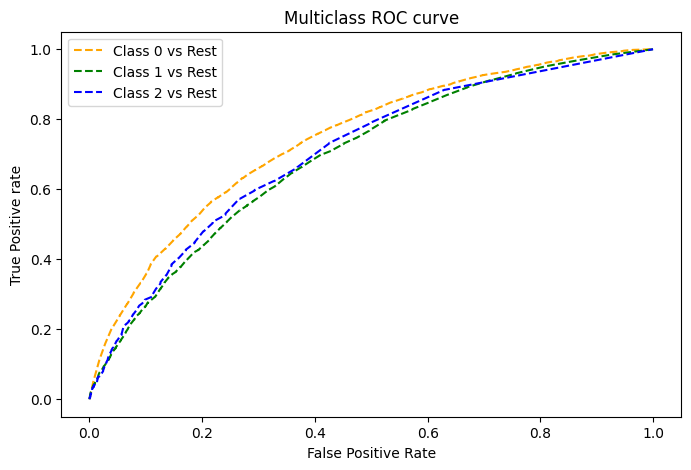

In [ ]:
rf_default_SMOTETomek = RandomForestClassifier(random_state = 42)
rf_default_SMOTETomek.fit(x_smtom,y_smtom)

result=evaluate_model(rf_default_SMOTETomek,x_smtom,y_smtom,X_test,y_test,'Random_forest_default_SMOTETomek')
final_dict['Random_forest_default_SMOTETomek']=result

#### 2. Cross- Validation & Hyperparameter Tuning

### **HyperTunning Random Forest with Original data**

Fitting 3 folds for each of 50 candidates, totalling 150 fits
----- Evaluation on train data -----

Confusion matrix 

[[43666   287     0]
 [ 8024   807     0]
 [ 1628   270     0]]

 Accuracy =  0.8133023664094218

 Recall =  0.8133023664094218

 Precision =  0.7538332687355866

 F1 score =  0.7472296514048459

 Roc_Auc score =  0.7989095470968998


----- Evaluation on test data -----

Confusion matrix 

[[10895    93     0]
 [ 2012   196     0]
 [  419    56     0]]

 Accuracy =  0.8112793504498573

 Recall =  0.8112793504498573

 Precision =  0.7488779482654455

 F1 score =  0.7451085633695718

 Roc_Auc score =  0.7844747692403985


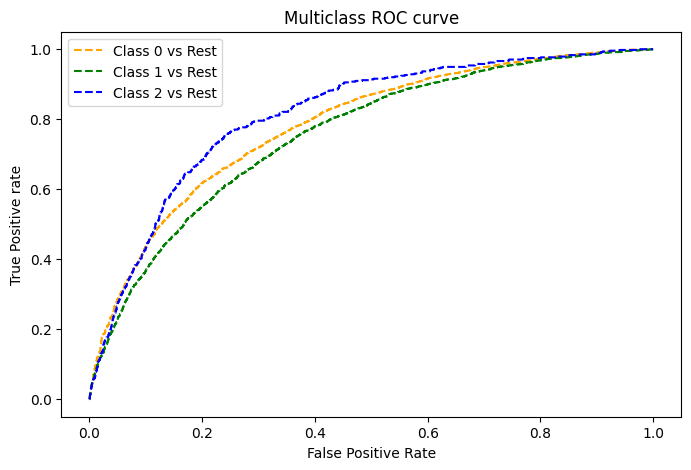

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
RF_optimized_original = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    {'bootstrap': [True, False],
 'max_depth': [4,8],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [30,40,50,60],
 'min_samples_split': [40,50,80]},
    n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1,
    scoring='roc_auc'
)
RF_optimized_original.fit(X_train,y_train)
# best parameters
RF_optimized_original_best_params=RF_optimized_original.best_params_
# Fit the Algorithm
RF_optimized_original_data = RandomForestClassifier(n_estimators=100,
                                 bootstrap=RF_optimized_original_best_params['bootstrap'],
                                 min_samples_split=RF_optimized_original_best_params['min_samples_split'],
                                 max_depth=RF_optimized_original_best_params['max_depth'],
                                 min_samples_leaf=RF_optimized_original_best_params['min_samples_leaf'],
                                 max_features=RF_optimized_original_best_params['max_features'],
                                 random_state=0)
RF_optimized_original_data.fit(X_train,y_train)
# Predict on the model

result=evaluate_model(RF_optimized_original_data,X_train,y_train,X_test,y_test,'Random_forest_Optimized_Original_data')
final_dict['Random_forest_Optimized_Original_data']=result

### **HyperTunning Random Forest with Random Undersampling**

Fitting 3 folds for each of 50 candidates, totalling 150 fits
----- Evaluation on train data -----

Confusion matrix 

[[1344  250  304]
 [ 533  530  835]
 [ 311  287 1300]]

 Accuracy =  0.5574288724973656

 Recall =  0.5574288724973656

 Precision =  0.5479949009766023

 F1 score =  0.5382843489153207

 Roc_Auc score =  0.7527465918129486


----- Evaluation on test data -----

Confusion matrix 

[[7680 1575 1733]
 [ 658  527 1023]
 [  81   68  326]]

 Accuracy =  0.6241679467485919

 Recall =  0.6241679467485919

 Precision =  0.7760932739258576

 F1 score =  0.6813899016508325

 Roc_Auc score =  0.7588024640133341


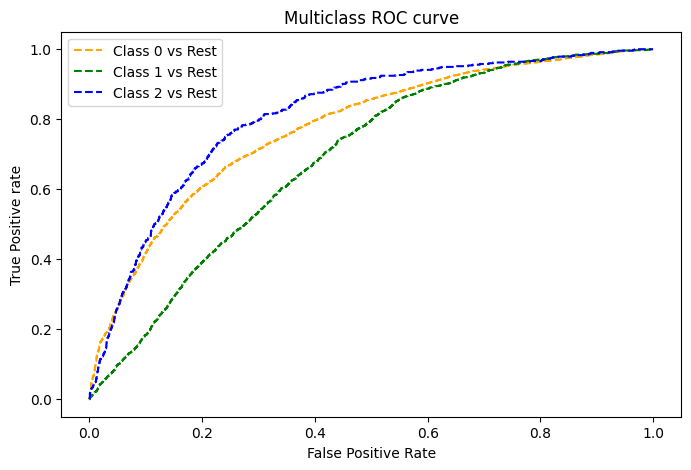

In [ ]:
RF_optimized_rus = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    {'bootstrap': [True, False],
 'max_depth': [4,8,15,20,25,30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [30,40,50,60],
 'min_samples_split': [40,50,80]},
    n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1,
    scoring='roc_auc'
)
RF_optimized_rus.fit(x_rus,y_rus)
# best parameters
RF_optimized_rus_best_params=RF_optimized_rus.best_params_
# Fit the Algorithm
RF_optimized_rus_data = RandomForestClassifier(n_estimators=100,
                                 bootstrap=RF_optimized_rus_best_params['bootstrap'],
                                 min_samples_split=RF_optimized_rus_best_params['min_samples_split'],
                                 max_depth=RF_optimized_rus_best_params['max_depth'],
                                 min_samples_leaf=RF_optimized_rus_best_params['min_samples_leaf'],
                                 max_features=RF_optimized_rus_best_params['max_features'],
                                 random_state=0)
RF_optimized_rus_data.fit(x_rus,y_rus)
# Predict on the model

result=evaluate_model(RF_optimized_rus_data,x_rus,y_rus,X_test,y_test,'Random_forest_Optimized_random_undersampling_data')
final_dict['Random_forest_Optimized_random_undersampling_data']=result

### **HyperTunning Random Forest with SMOTE**

Fitting 3 folds for each of 50 candidates, totalling 150 fits
----- Evaluation on train data -----

Confusion matrix 

[[32850  6417  4686]
 [12080 15381 16492]
 [ 6253  6334 31366]]

 Accuracy =  0.6036523862610819

 Recall =  0.6036523862610819

 Precision =  0.5951686356264707

 F1 score =  0.5891430880708869

 Roc_Auc score =  0.7902645421583988


----- Evaluation on test data -----

Confusion matrix 

[[8216 1635 1137]
 [ 785  689  734]
 [ 101  130  244]]

 Accuracy =  0.6692268305171531

 Recall =  0.6692268305171531

 Precision =  0.7748624832953138

 F1 score =  0.7116845533849202

 Roc_Auc score =  0.7673855335860615


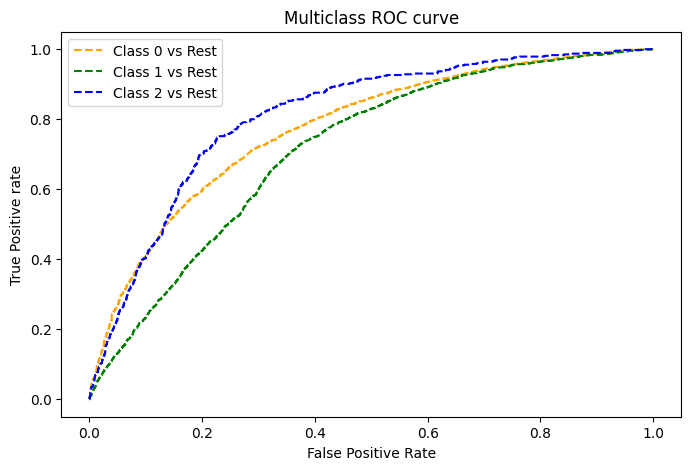

In [ ]:
RF_optimized_SMOTE = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    {'bootstrap': [True, False],
 'max_depth': [4,8,15,20,25,30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [30,40,50,60],
 'min_samples_split': [40,50,80]},
    n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1,
    scoring='roc_auc'
)
RF_optimized_SMOTE.fit(x_smote,y_smote)
# best parameters
RF_optimized_SMOTE_best_params=RF_optimized_SMOTE.best_params_
# Fit the Algorithm
RF_optimized_SMOTE_data = RandomForestClassifier(n_estimators=100,
                                 bootstrap=RF_optimized_SMOTE_best_params['bootstrap'],
                                 min_samples_split=RF_optimized_SMOTE_best_params['min_samples_split'],
                                 max_depth=RF_optimized_SMOTE_best_params['max_depth'],
                                 min_samples_leaf=RF_optimized_SMOTE_best_params['min_samples_leaf'],
                                 max_features=RF_optimized_SMOTE_best_params['max_features'],
                                 random_state=0)
RF_optimized_SMOTE_data.fit(x_smote,y_smote)
# Predict on the model

result=evaluate_model(RF_optimized_SMOTE_data,x_smote,y_smote,X_test,y_test,'Random_forest_Optimized_SMOTE_data')
final_dict['Random_forest_Optimized_SMOTE_data']=result

### **HyperTunning Random Forest with SMOTETomek**

Fitting 3 folds for each of 50 candidates, totalling 150 fits
----- Evaluation on train data -----

Confusion matrix 

[[31932  5809  4484]
 [11326 14551 16444]
 [ 6255  6241 30749]]

 Accuracy =  0.6043618095171022

 Recall =  0.6043618095171022

 Precision =  0.5956097691209613

 F1 score =  0.5891071817990692

 Roc_Auc score =  0.7953492335182079


----- Evaluation on test data -----

Confusion matrix 

[[8238 1566 1184]
 [ 788  668  752]
 [ 100  121  254]]

 Accuracy =  0.6700314534415917

 Recall =  0.6700314534415917

 Precision =  0.7753795411316223

 F1 score =  0.7122840286173672

 Roc_Auc score =  0.7674706124077614


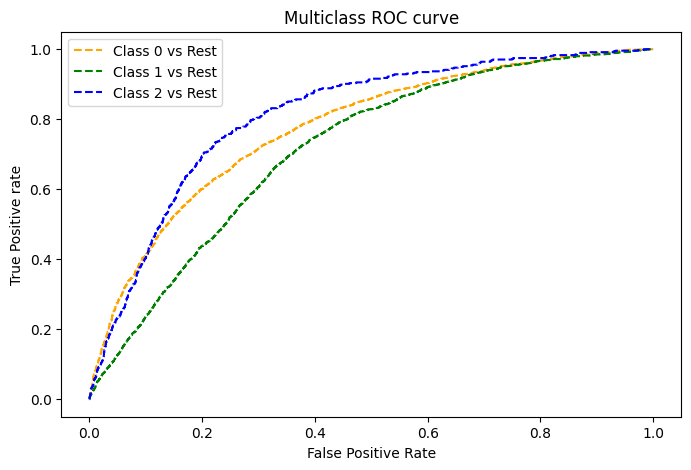

In [ ]:
RF_optimized_SMOTETomek = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    {'bootstrap': [True, False],
 'max_depth': [4,8,16,25,30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [30,40,50,60],
 'min_samples_split': [40,50,80]},
    n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1,
    scoring='roc_auc'
)
RF_optimized_SMOTETomek.fit(x_smtom,y_smtom)
# best parameters
RF_optimized_SMOTETomek_best_params=RF_optimized_SMOTETomek.best_params_
# Fit the Algorithm
RF_optimized_SMOTETomek_data = RandomForestClassifier(n_estimators=100,
                                 bootstrap=RF_optimized_SMOTETomek_best_params['bootstrap'],
                                 min_samples_split=RF_optimized_SMOTETomek_best_params['min_samples_split'],
                                 max_depth=RF_optimized_SMOTETomek_best_params['max_depth'],
                                 min_samples_leaf=RF_optimized_SMOTETomek_best_params['min_samples_leaf'],
                                 max_features=RF_optimized_SMOTETomek_best_params['max_features'],
                                 random_state=0)
RF_optimized_SMOTETomek_data.fit(x_smtom,y_smtom)
# Predict on the model

result=evaluate_model(RF_optimized_SMOTETomek_data,x_smtom,y_smtom,X_test,y_test,'Random_forest_Optimized_SMOTETomek_data')
final_dict['Random_forest_Optimized_SMOTETomek_data']=result

##### Which hyperparameter optimization technique have you used and why?

*   *We have used RandomizedSearchCV as tunning on all possible combination of parameter grid was time taking.*


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Yes, after the hypertunning we have a improvement on the following models:**

*   Random Forest on original data ROC_AUC score has been increased 0.7267 to 0.7844 i.e approximately 6 % increase in ROC_AUC

*   Random Forest on Randon Undersampling the ROC_AUC has been increased to 0.7107 to 0.7588 approximately 4% has been inreased in ROC_AUC

*   Random Forest on SMOTE the ROC_AUC has been increased to 0.7125 to 0.7672 approximately 5% has been inreased in ROC_AUC

*   Random Forest on SMOTETomek the ROC_AUC has been increased to 0.7151 to 0.7674 approximately 5% has been inreased in ROC_AUC

**According to catboost model Total_past_communications,subject_hotness_score word_count and email_attachments which was combination of total_links and total_images are most important features.**

### **KNN Classifier on Original Data**

----- Evaluation on train data -----

Confusion matrix 

[[42670  1250    33]
 [ 5865  2909    57]
 [ 1360   400   138]]

 Accuracy =  0.8360520829523427

 Recall =  0.8360520829523427

 Precision =  0.8114569114352538

 F1 score =  0.8056004273845074

 Roc_Auc score =  0.905112713824653


----- Evaluation on test data -----

Confusion matrix 

[[10407   562    19]
 [ 1745   437    26]
 [  349   115    11]]

 Accuracy =  0.7940165313437203

 Recall =  0.7940165313437203

 Precision =  0.7392945252719995

 F1 score =  0.756144035791445

 Roc_Auc score =  0.6646768124414951


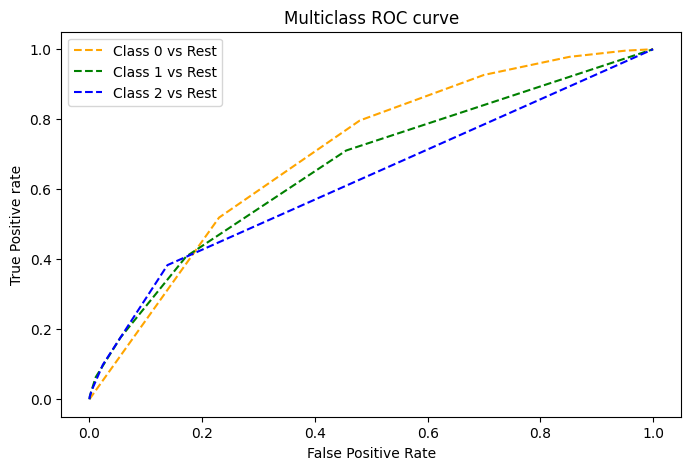

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_orginal = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Fit the model on the train set
knn_orginal.fit(X_train,y_train)

result=evaluate_model(knn_orginal,X_train,y_train,X_test,y_test,'KNN_orginal_data')
final_dict['KNN_orginal_data']=result

### **KNN on Random Undersampling**

----- Evaluation on train data -----

Confusion matrix 

[[1464  295  139]
 [ 432 1134  332]
 [ 317  454 1127]]

 Accuracy =  0.6541974007727432

 Recall =  0.6541974007727432

 Precision =  0.6563441558168837

 F1 score =  0.6522712065836443

 Roc_Auc score =  0.8456155019444423


----- Evaluation on test data -----

Confusion matrix 

[[6931 2697 1360]
 [ 731  797  680]
 [ 103  160  212]]

 Accuracy =  0.5807914563674932

 Recall =  0.5807914563674932

 Precision =  0.7559177856624595

 F1 score =  0.6434392057141972

 Roc_Auc score =  0.6771320838000124


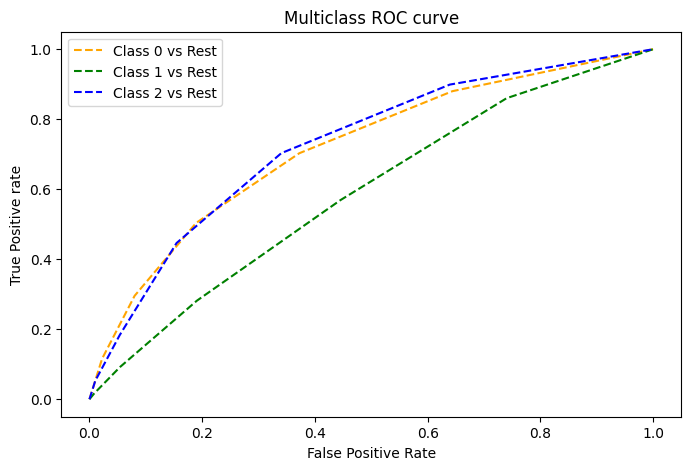

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_rus = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Fit the model on the train set
knn_rus.fit(x_rus,y_rus)

result=evaluate_model(knn_rus,x_rus,y_rus,X_test,y_test,'KNN_random_undersampling_data')
final_dict['KNN_random_undersampling_data']=result

### **KNN on SMOTE**

----- Evaluation on train data -----

Confusion matrix 

[[32147  8273  3533]
 [ 1000 41786  1167]
 [  342   839 42772]]

 Accuracy =  0.8850742080555745

 Recall =  0.8850742080555745

 Precision =  0.8939655648209506

 F1 score =  0.8823275185114994

 Roc_Auc score =  0.9846654359247781


----- Evaluation on test data -----

Confusion matrix 

[[7141 2734 1113]
 [ 831  917  460]
 [ 126  219  130]]

 Accuracy =  0.5989320459366543

 Recall =  0.5989320459366543

 Precision =  0.7496828806765492

 F1 score =  0.6543225488108113

 Roc_Auc score =  0.6323278270419795


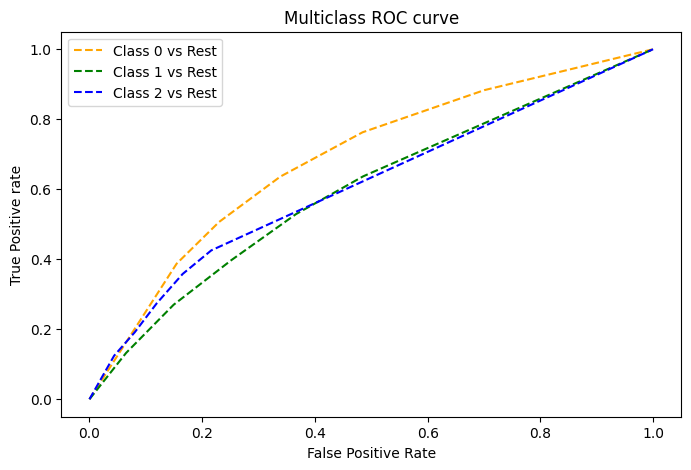

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_smote = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Fit the model on the train set
knn_smote.fit(x_smote,y_smote)

result=evaluate_model(knn_smote,x_smote,y_smote,X_test,y_test,'KNN_SMOTE_data')
final_dict['KNN_SMOTE_data']=result

### **KNN on SMOTETomek**

----- Evaluation on train data -----

Confusion matrix 

[[31305  7549  3371]
 [  701 40507  1113]
 [  269   668 42308]]

 Accuracy =  0.893020635256004

 Recall =  0.893020635256004

 Precision =  0.9017903438097984

 F1 score =  0.8904031790582734

 Roc_Auc score =  0.9874339379677197


----- Evaluation on test data -----

Confusion matrix 

[[7078 2745 1165]
 [ 811  907  490]
 [ 121  211  143]]

 Accuracy =  0.5945431936215346

 Recall =  0.5945431936215346

 Precision =  0.7509102551036747

 F1 score =  0.6515260041831132

 Roc_Auc score =  0.639531317933196


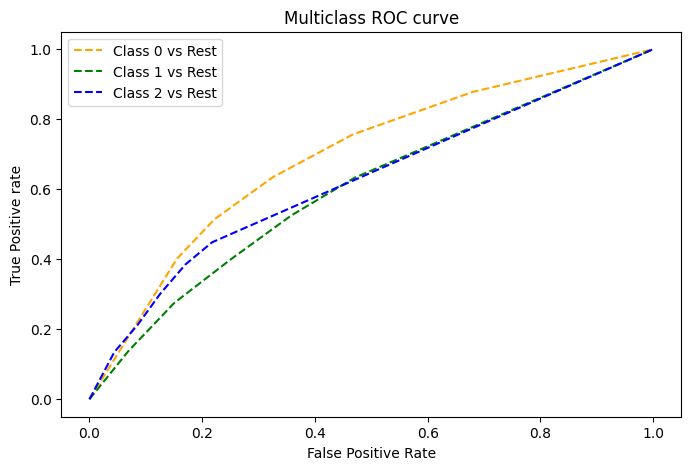

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_smotetomek = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Fit the model on the train set
knn_smotetomek.fit(x_smtom,y_smtom)

result=evaluate_model(knn_smotetomek,x_smtom,y_smtom,X_test,y_test,'KNN_smotetomek_data')
final_dict['KNN_smotetomek_data']=result

### **Hypertunning KNN with Original data**

Fitting 3 folds for each of 42 candidates, totalling 126 fits
----- Evaluation on train data -----

Confusion matrix 

[[43204   749     0]
 [ 7516  1315     0]
 [ 1472   426     0]]

 Accuracy =  0.8141435938700121

 Recall =  0.8141435938700121

 Precision =  0.7506602119420058

 F1 score =  0.7599071496853699

 Roc_Auc score =  0.809107263405228


----- Evaluation on test data -----

Confusion matrix 

[[10777   211     0]
 [ 1886   322     0]
 [  383    92     0]]

 Accuracy =  0.8118645307585399

 Recall =  0.8118645307585399

 Precision =  0.7471651831980272

 F1 score =  0.7575235199057293

 Roc_Auc score =  0.7672506852832631


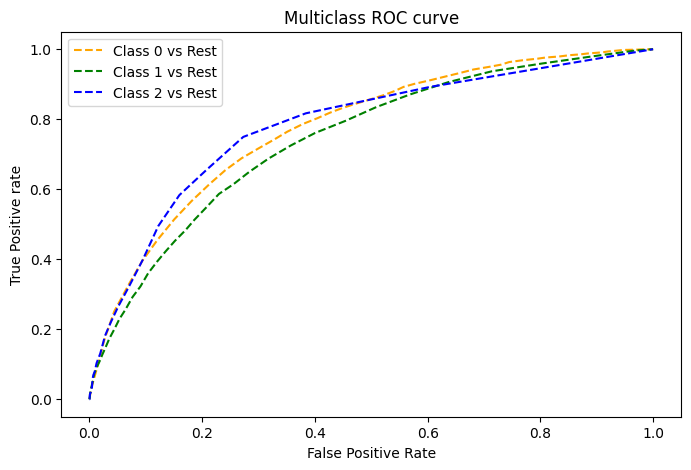

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,15,33,49,63],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
Knn_optimized = RandomizedSearchCV(KNeighborsClassifier(),grid_params, n_iter=52,verbose = 1, cv=3, n_jobs = -1)
Knn_optimized.fit(X_train, y_train)
# saving the best parameters
best_params=Knn_optimized.best_params_
knn_optimized_original = KNeighborsClassifier(n_neighbors = best_params['n_neighbors'], weights = best_params['weights'],algorithm = 'brute',metric = best_params['metric'])
# fitting the optimized model
knn_optimized_original.fit(X_train, y_train)
# storing the results after evaluation
result=evaluate_model(knn_optimized_original,X_train,y_train,X_test,y_test,'KNN_optimized_orginal_data')
final_dict['KNN_optimized_orginal_data']=result

### **Hypertunning KNN on Random Undersampling**

Fitting 3 folds for each of 42 candidates, totalling 126 fits
----- Evaluation on train data -----

Confusion matrix 

[[1898    0    0]
 [   3 1895    0]
 [   2    7 1889]]

 Accuracy =  0.9978925184404637

 Recall =  0.9978925184404637

 Precision =  0.9978974110463324

 F1 score =  0.9978921421294408

 Roc_Auc score =  0.999995188398266


----- Evaluation on test data -----

Confusion matrix 

[[7210 2067 1711]
 [ 605  670  933]
 [  75  101  299]]

 Accuracy =  0.5982737180893863

 Recall =  0.5982737180893863

 Precision =  0.776133846185092

 F1 score =  0.6629113192755809

 Roc_Auc score =  0.7394853578531203


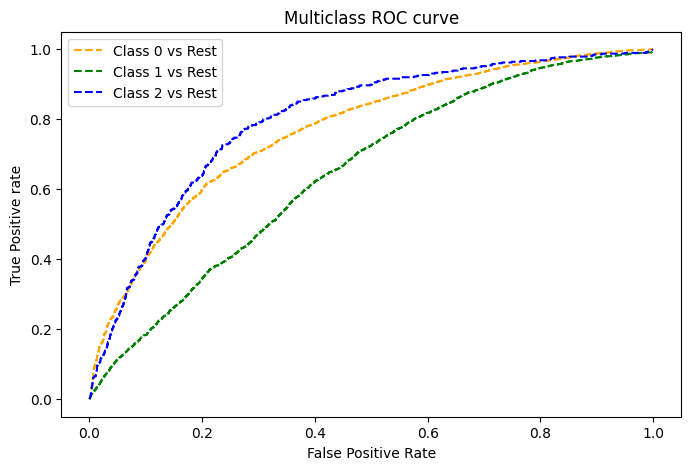

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,15,33,49,63],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
Knn_optimized = RandomizedSearchCV(KNeighborsClassifier(),grid_params, n_iter=52,verbose = 1, cv=3, n_jobs = -1)
Knn_optimized.fit(x_rus, y_rus)
# saving the best parameters
best_params=Knn_optimized.best_params_
knn_optimized_rus = KNeighborsClassifier(n_neighbors = best_params['n_neighbors'], weights = best_params['weights'],algorithm = 'brute',metric = best_params['metric'])
# fitting the optimized model
knn_optimized_rus.fit(x_rus, y_rus)
# storing the results after evaluation
result=evaluate_model(knn_optimized_rus,x_rus, y_rus,X_test,y_test,'KNN_optimized_random_undersampling_data')
final_dict['KNN_optimized_random_undersampling_data']=result

### **Hypertunning KNN on SMOTE**

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,15,33,49,63],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
Knn_optimized = RandomizedSearchCV(KNeighborsClassifier(),grid_params, n_iter=52,verbose = 1, cv=3, n_jobs = -1)
Knn_optimized.fit(x_smote, y_smote)
# saving the best parameters
best_params=Knn_optimized.best_params_
knn_optimized_smote = KNeighborsClassifier(n_neighbors = best_params['n_neighbors'], weights = best_params['weights'],algorithm = 'brute',metric = best_params['metric'])
# fitting the optimized model
knn_optimized_smote.fit(x_smote, y_smote)
# storing the results after evaluation
result=evaluate_model(knn_optimized_smote,x_smote, y_smote,X_test,y_test,'KNN_optimized_smote_data')
final_dict['KNN_optimized_smote_data']=result

### **Hypertunning KNN on SMOTETomek**

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,15,33,49,63],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
Knn_optimized = RandomizedSearchCV(KNeighborsClassifier(),grid_params, n_iter=40,verbose = 1, cv=3, n_jobs = -1)
Knn_optimized.fit(x_smtom, y_smtom)
# saving the best parameters
best_params=Knn_optimized.best_params_
knn_optimized_smotetomek = KNeighborsClassifier(n_neighbors = best_params['n_neighbors'], weights = best_params['weights'],algorithm = 'brute',metric = best_params['metric'])
# fitting the optimized model
knn_optimized_smotetomek.fit(x_smtom, y_smtom)
# storing the results after evaluation
result=evaluate_model(knn_optimized_smotetomek,x_smtom, y_smtom,X_test,y_test,'KNN_optimized_smotetomek_data')
final_dict['KNN_optimized_smotetomek_data']=result

### **SVM model on Original data**

In [ ]:
svc_model_original = SVC(probability=True)

# Fitting on the train set
svc_model_original.fit(X_train,y_train)
result=evaluate_model(svc_model_original,X_train,y_train,X_test,y_test,'SVM_default_original_Data')
final_dict['SVM_default_original_Data']=result

### **SVM on Random Undersampling**

In [ ]:
svc_model_rus = SVC(probability=True)

# Fitting on the train set
svc_model_rus.fit(x_rus,y_rus)
result=evaluate_model(svc_model_rus,x_rus,y_rus,X_test,y_test,'SVM_default_Random_undersampling_Data')
final_dict['SVM_default_Random_undersampling_Data']=result

### **Hypertunning SVM on Original**

In [ ]:
param_grid = {'C': [0.01,0.1,1,10,100],
              'gamma': [1, 0.1,0.01],
              'kernel': ['Polynomial', 'rbf']}
SVM_optimized_original = RandomizedSearchCV(SVC(probability=True), param_grid,n_iter=10, refit = True, verbose = 3)

# fitting the model for grid search
SVM_optimized_original.fit(X_train, y_train)

In [ ]:
result=evaluate_model(SVM_optimized_original,X_train,y_train,X_test,y_test,'Hypertuned_SVM_On_original_data')
final_dict['Hypertuned_SVM_On_original_data']=result

In [ ]:
final_result=pd.DataFrame(final_dict).T
final_result

<Figure size 3000x2000 with 0 Axes>

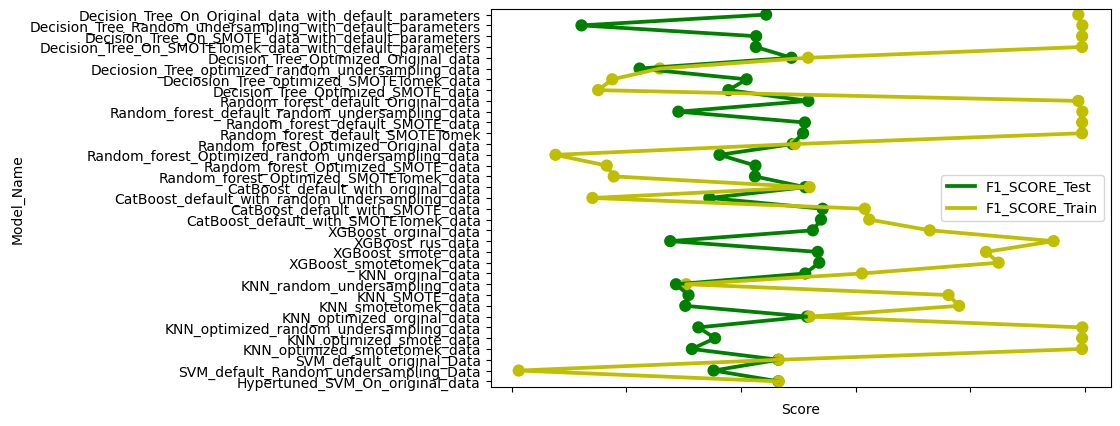

<Figure size 800x500 with 0 Axes>

In [ ]:
ax=plt.figure(figsize=(30,20))
# creating subplots
ax = plt.subplots()
# plotting columns
ax = sns.pointplot(x=final_result["F1_SCORE_Test"], y=final_result["MODEL_NAME"], color='g',alpha=0.2,labels=('F1_SCORE_Test'))
ax = sns.pointplot(x=final_result["F1_SCORE_Train"], y=final_result["MODEL_NAME"], color='y',alpha=0.7,labels=('F1_SCORE_Train'))
# renaming the axes
ax.set(xlabel="Score", ylabel="Model_Name")
ax.legend(handles=ax.lines[::len(final_result)+1], labels=["F1_SCORE_Test","F1_SCORE_Train"])

ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# visulaizing illustration
plt.show()
plt.tight_layout()

<Figure size 3000x2000 with 0 Axes>

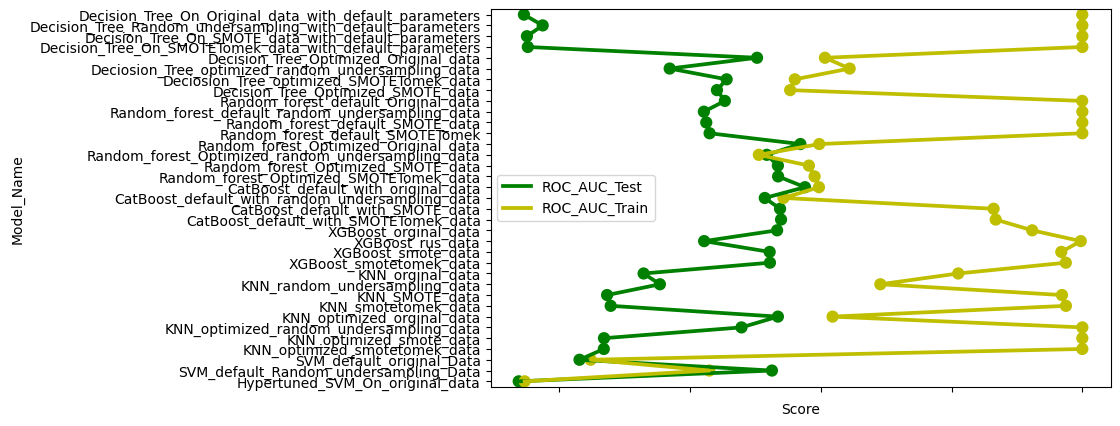

<Figure size 800x500 with 0 Axes>

In [ ]:
ax=plt.figure(figsize=(30,20))
# creating subplots
ax = plt.subplots()
# plotting columns
ax = sns.pointplot(x=final_result["ROC_AUC_Test"], y=final_result["MODEL_NAME"], color='g',alpha=0.2,labels=('ROC_AUC_Test'))
ax = sns.pointplot(x=final_result["ROC_AUC_Train"], y=final_result["MODEL_NAME"], color='y',alpha=0.7,labels=('ROC_AUC_Train'))
# renaming the axes
ax.set(xlabel="Score", ylabel="Model_Name")
ax.legend(handles=ax.lines[::len(final_result)+1], labels=["ROC_AUC_Test","ROC_AUC_Train"])

ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# visulaizing illustration
plt.show()
plt.tight_layout()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We choosed F1 score,precision and recall as a evaluation metrics for analysing the model performance. F1 score which is a combination of both precision and recall so we used f1 score for judgment of better model.

In Imbalanced classifcation the accuracy will not give the actual information, accuracy can be misguiding for a Imbalanced classification as high accuracy doesnt imply high accuracy for the minority classes. It may be like we can get 99% accuracy but the model may be baised to majority class , it may be predicting all wrong classes for minority classes and still we can get 99% accuracy. In such scenarios the model would be bad, so using information of precision and recall we can get idea of how actualy model is performing

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Final Model which is working good is the **CatBoost with SMOTE data** as it has higher F1 score value on test data and also it has very less overfitting,and it has good ROC_AUC score as well.

# **Conclusion**

*   We found that our customer location feature to be not related with dependent variable email status.

*   We found total_links and total_images are multicorrelated, so we created another feature email_attachments which combines the total_links and total_images.

*   We found through feature selection that email_type and time_email_sent_category to be not related to the dependent variable.

*   We found that removing outliers would impact the minority class with more than 5% loss of data, so we decided not to drop the outliers.

*   We found that in the Email Campaign Type feature, it seems like in campaign type 1 very few emails were sent but has a very high likelihood of getting read. Most emails were sent under email campaign type 2 and most ignored. Seems like campaign 3 was a success as even when less number of emails were sent under campaign 3, more emails were read and acknowledged.

**Model Interpretations**

>
*    For the modeling part we found that SMOTETomek  data was good for most of the models.
*    RandomizedSerchCV hypertunning technique was used and it was useful and time saving.
*    Overall Catboost with SMOTE was giving best results with 77.1% F1 score on test data and 80.1% F1 score on Training data.
*  According to catboost model Total_past_communications,subject_hotness_score word_count and email_attachments which was combination of total_links and total_images are most important features.



### ***Hurrah! Successfully completed Machine Learning Capstone Project !!!***